In [169]:
import xarray as xr

In [170]:
filename = "merge_2019.nc"

In [171]:
ds = xr.open_dataset(filename)
print("Loaded dataset:", filename)

Loaded dataset: merge_2019.nc


In [172]:
print("\nVariables and descriptions:")
for var_name, var_da in ds.data_vars.items():
    desc = var_da.attrs.get('long_name') or var_da.attrs.get('standard_name') \
           or var_da.attrs.get('description') or "No description available"
    print(f" - {var_name}: {desc}")


Variables and descriptions:
 - time_bnds: No description available
 - precipitationCal: Daily accumulated precipitation (combined microwave-IR) estimate
 - HQprecipitation: Daily accumulated High Quality precipitation from all available MW sources
 - precipitationCal_cnt: Count of all valid half-hourly precipitationCal retrievals for the day
 - randomError: Daily total error of precipitation estimate
 - randomError_cnt: Count of valid half-hourly randomError retrievals for the day
 - precipitationCal_cnt_cond: Count of valid half-hourly precipitationCal retrievals for the day where precipitation is greater than 0
 - HQprecipitation_cnt: Count of all valid half-hourly HQprecipitation retrievals for the day
 - HQprecipitation_cnt_cond: Count of valid half-hourly HQprecipitation retrievals for the day where precipitation is greater than 0


In [173]:
lat_name = None
lon_name = None
for coord in ds.coords:
    name_lower = coord.lower()
    if 'lat' in name_lower:
        lat_name = coord
    if 'lon' in name_lower:
        lon_name = coord
if lat_name and lon_name:
    lat_vals = ds[lat_name]
    lon_vals = ds[lon_name]
    lat_min = float(lat_vals.min())
    lat_max = float(lat_vals.max())
    lon_min = float(lon_vals.min())
    lon_max = float(lon_vals.max())
    print(f"\nGeographic region covered by data:")
    print(f" - Latitude range:  {lat_min:.4f} to {lat_max:.4f}")
    print(f" - Longitude range: {lon_min:.4f} to {lon_max:.4f}")
else:
    print("\nError: Latitude/Longitude coordinates not found in the dataset.")


Geographic region covered by data:
 - Latitude range:  4.9500 to 39.9500
 - Longitude range: 60.0500 to 100.0500


In [174]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [175]:
print(ds['time'].values)
print(len(ds['time']), len(set(ds['time'].values)))


['2019-06-02T00:00:00.000000000' '2019-06-03T00:00:00.000000000'
 '2019-06-04T00:00:00.000000000' '2019-06-05T00:00:00.000000000'
 '2019-06-06T00:00:00.000000000' '2019-06-07T00:00:00.000000000'
 '2019-06-08T00:00:00.000000000' '2019-06-09T00:00:00.000000000'
 '2019-06-10T00:00:00.000000000' '2019-06-11T00:00:00.000000000'
 '2019-06-12T00:00:00.000000000' '2019-06-13T00:00:00.000000000'
 '2019-06-14T00:00:00.000000000' '2019-06-15T00:00:00.000000000'
 '2019-06-16T00:00:00.000000000' '2019-06-17T00:00:00.000000000'
 '2019-06-18T00:00:00.000000000' '2019-06-19T00:00:00.000000000'
 '2019-06-20T00:00:00.000000000' '2019-06-21T00:00:00.000000000'
 '2019-06-22T00:00:00.000000000' '2019-06-23T00:00:00.000000000'
 '2019-06-24T00:00:00.000000000' '2019-06-25T00:00:00.000000000'
 '2019-06-27T00:00:00.000000000' '2019-06-28T00:00:00.000000000'
 '2019-06-29T00:00:00.000000000' '2019-06-30T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-07-03T00:00:00.000000000'
 '2019-07-04T00:00:00.000

In [176]:
_, index = np.unique(ds['time'], return_index=True)
ds = ds.isel(time=index)

In [177]:
rainfall = ds['precipitationCal'].sel(time='2019-06-10')

In [178]:
date_of_interest = '2019-06-08'
rainfall = ds['precipitationCal'].sel(time=date_of_interest)

In [179]:
print("Rainfall min:", rainfall.min().values)
print("Rainfall max:", rainfall.max().values)




Rainfall min: 0.0
Rainfall max: 484.40417


In [180]:
date_of_interest = '2019-08-07'
rainfall = ds['precipitationCal'].sel(time=date_of_interest)

print("Rainfall min:", rainfall.min().values)
print("Rainfall max:", rainfall.max().values)


Rainfall min: 0.0
Rainfall max: 271.71725


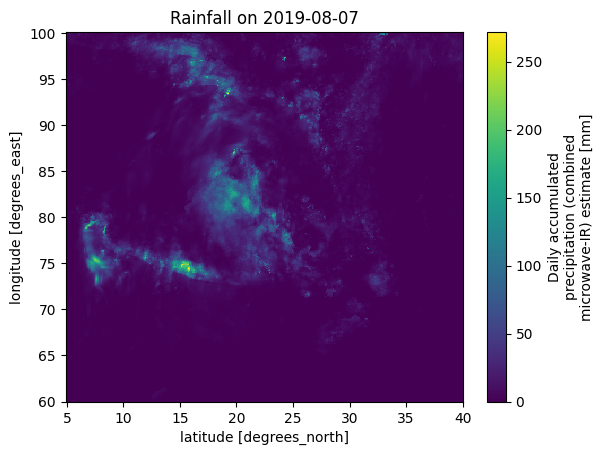

In [181]:
rainfall.plot()
plt.title(f"Rainfall on {date_of_interest}")
plt.show()


In [182]:
convective = rainfall.where(rainfall > 50)
stratiform = rainfall.where((rainfall > 0) & (rainfall <= 50))


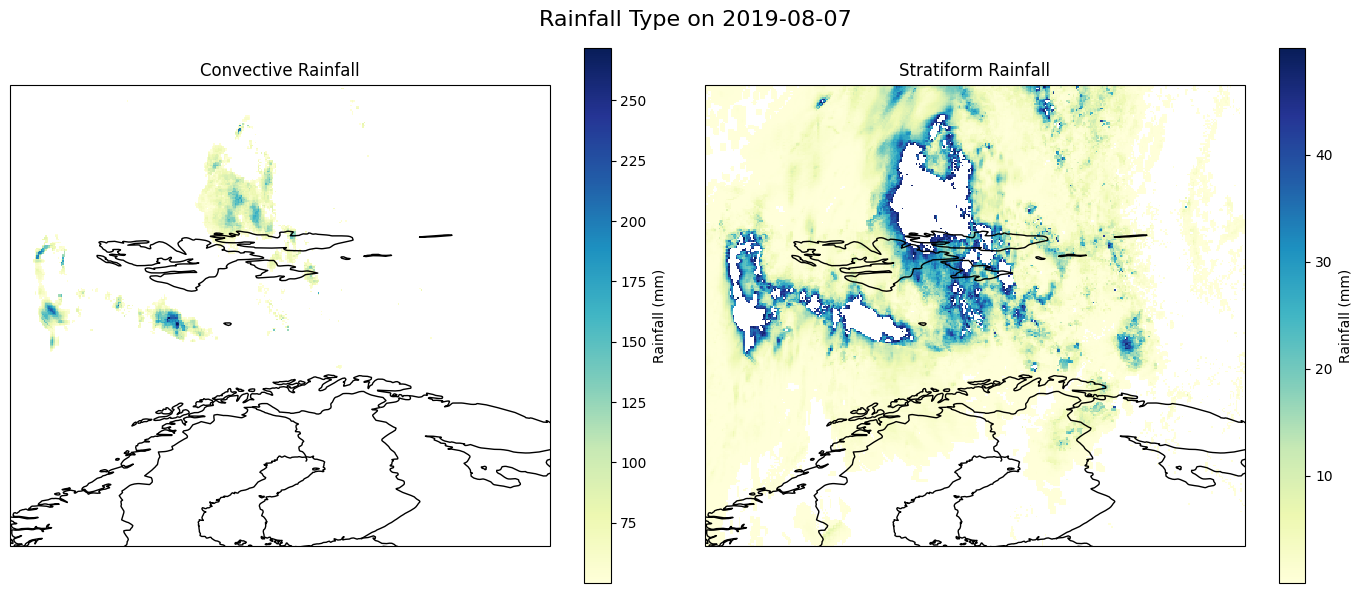

In [183]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})

for ax, data, title in zip(axs, [convective, stratiform], ['Convective Rainfall', 'Stratiform Rainfall']):
    im = data.plot(
        ax=ax,
        cmap='YlGnBu',
        cbar_kwargs={'label': 'Rainfall (mm)'},
        transform=ccrs.PlateCarree()
    )
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    # ax.set_extent([60, 100, 0, 40], crs=ccrs.PlateCarree())
    ax.set_title(title)

plt.suptitle(f"Rainfall Type on {date_of_interest}", fontsize=16)
plt.tight_layout()
plt.show()

In [184]:
print("Convective non-NaNs:", convective.count().values)
print("Stratiform non-NaNs:", stratiform.count().values)


Convective non-NaNs: 5646
Stratiform non-NaNs: 98870


In [185]:
print(rainfall)


<xarray.DataArray 'precipitationCal' (lon: 401, lat: 351)> Size: 563kB
array([[ 0.13588 ,  0.800634,  2.64904 , ...,  0.      ,  0.      ,  0.      ],
       [ 0.12255 ,  0.429512,  1.6298  , ...,  0.      ,  0.      ,  0.      ],
       [ 0.024894,  0.24779 ,  0.938001, ...,  0.      ,  0.      ,  0.      ],
       ...,
       [ 5.290955,  6.070033,  8.456404, ...,  3.591517,  2.586381,  2.822227],
       [12.283875, 11.80598 , 12.701206, ...,  2.522329,  2.102828,  2.701672],
       [10.861596, 11.668125, 12.657498, ...,  2.59954 ,  1.930396,  2.478469]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 2kB 60.05 60.15 60.25 60.35 ... 99.85 99.95 100.1
  * lat      (lat) float32 1kB 4.95 5.05 5.15 5.25 ... 39.65 39.75 39.85 39.95
    time     datetime64[ns] 8B 2019-08-07
Attributes:
    long_name:     Daily accumulated precipitation (combined microwave-IR) es...
    units:         mm
    origname:      precipitationCal
    fullnamepath:  /precipitationCal


In [186]:
# Fix the orientation to (lat, lon)
rainfall = rainfall.transpose('lat', 'lon')
# Your data has shape (lon: 401, lat: 351), but you're likely plotting as if it were (lat, lon).




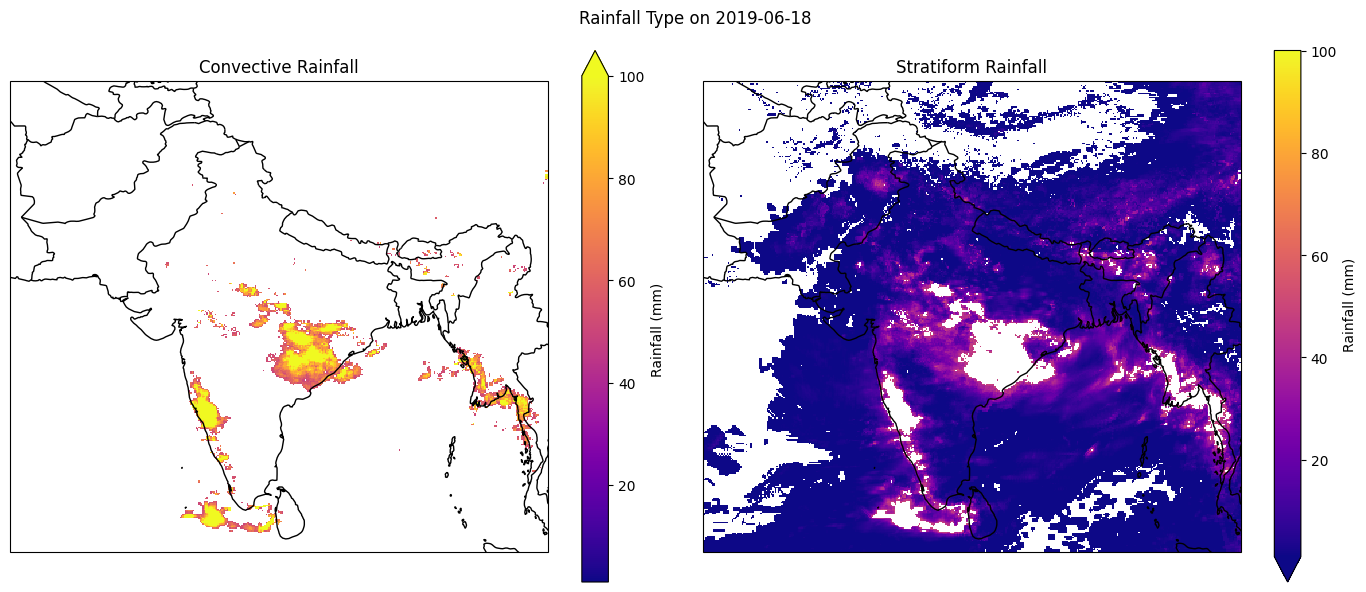

In [187]:
# Transpose
rainfall = rainfall.transpose('lat', 'lon')

# Threshold
convective = rainfall.where(rainfall > 50)
stratiform = rainfall.where((rainfall > 0) & (rainfall <= 50))

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})

for ax, data, title in zip(axs, [convective, stratiform], ['Convective Rainfall', 'Stratiform Rainfall']):
    im = data.plot(
        ax=ax,
        cmap='plasma',
        vmin=1, vmax=100,
        cbar_kwargs={'label': 'Rainfall (mm)'},
        transform=ccrs.PlateCarree()
    )
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())
    ax.set_title(title)

plt.suptitle("Rainfall Type on 2019-06-18")
plt.tight_layout()
plt.show()


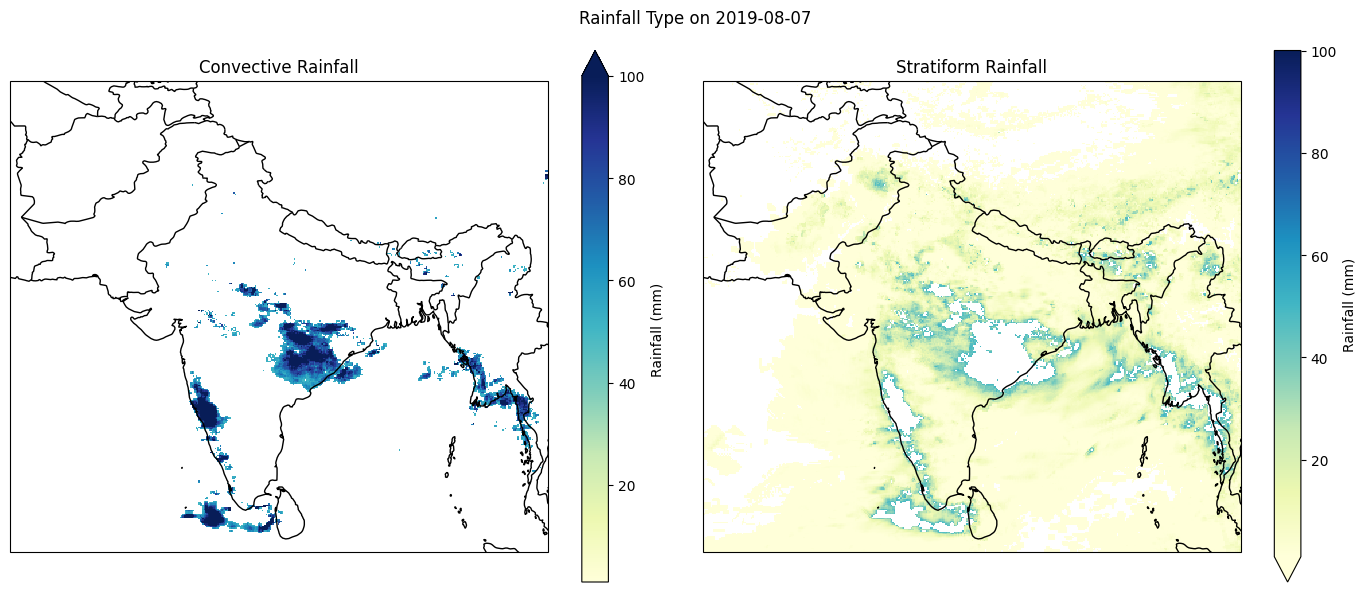

In [188]:
# Define rainfall types
convective = rainfall.where(rainfall > 50)
stratiform = rainfall.where((rainfall > 0) & (rainfall <= 50))

# Plot side-by-side maps
fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})
for ax, data, title in zip(axs, [convective, stratiform], ['Convective Rainfall', 'Stratiform Rainfall']):
    im = data.plot(
        ax=ax,
        cmap='YlGnBu',
        vmin=1, vmax=100,
        cbar_kwargs={'label': 'Rainfall (mm)'},
        transform=ccrs.PlateCarree()
    )
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())
    ax.set_title(title)
plt.suptitle(f"Rainfall Type on {date_of_interest}")
plt.tight_layout()
plt.show()



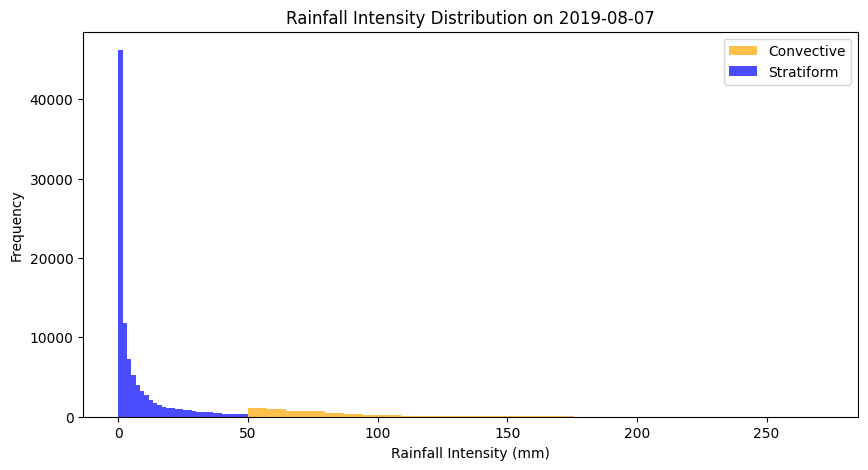

In [189]:
import numpy as np

# Flatten and remove NaNs for histogram
convective_vals = convective.values.flatten()
stratiform_vals = stratiform.values.flatten()
convective_vals = convective_vals[~np.isnan(convective_vals)]
stratiform_vals = stratiform_vals[~np.isnan(stratiform_vals)]

plt.figure(figsize=(10, 5))
plt.hist(convective_vals, bins=30, alpha=0.7, label='Convective', color='orange')
plt.hist(stratiform_vals, bins=30, alpha=0.7, label='Stratiform', color='blue')
plt.xlabel('Rainfall Intensity (mm)')
plt.ylabel('Frequency')
plt.title(f'Rainfall Intensity Distribution on {date_of_interest}')
plt.legend()
plt.show()


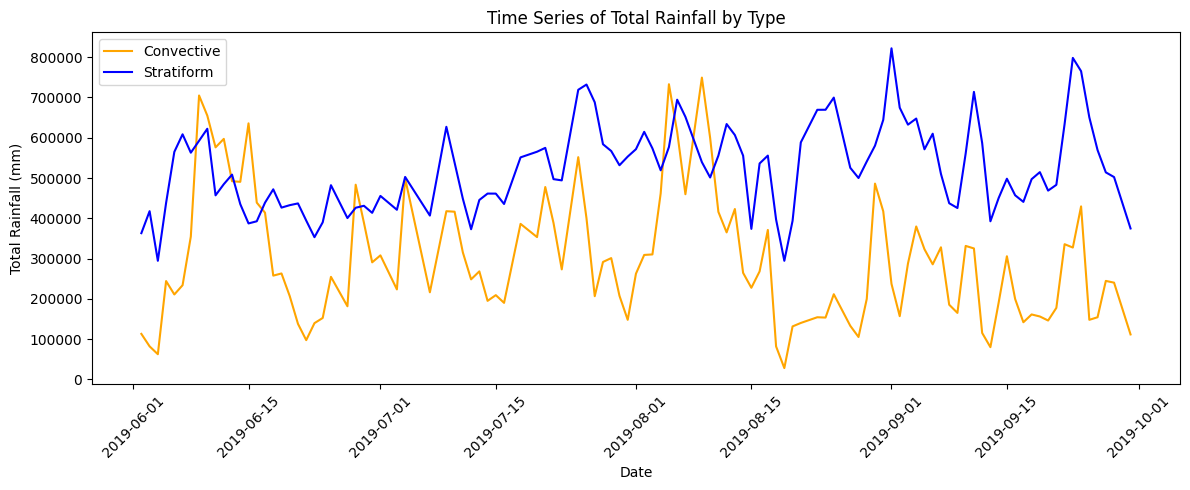

In [190]:
dates = ds['time'].values
total_convective = []
total_stratiform = []

for t in dates:
    rain = ds['precipitationCal'].sel(time=t)
    conv = rain.where(rain > 50)
    strat = rain.where((rain > 0) & (rain <= 50))
    total_convective.append(np.nansum(conv))
    total_stratiform.append(np.nansum(strat))

plt.figure(figsize=(12, 5))
plt.plot(dates, total_convective, label='Convective', color='orange')
plt.plot(dates, total_stratiform, label='Stratiform', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Rainfall (mm)')
plt.title('Time Series of Total Rainfall by Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


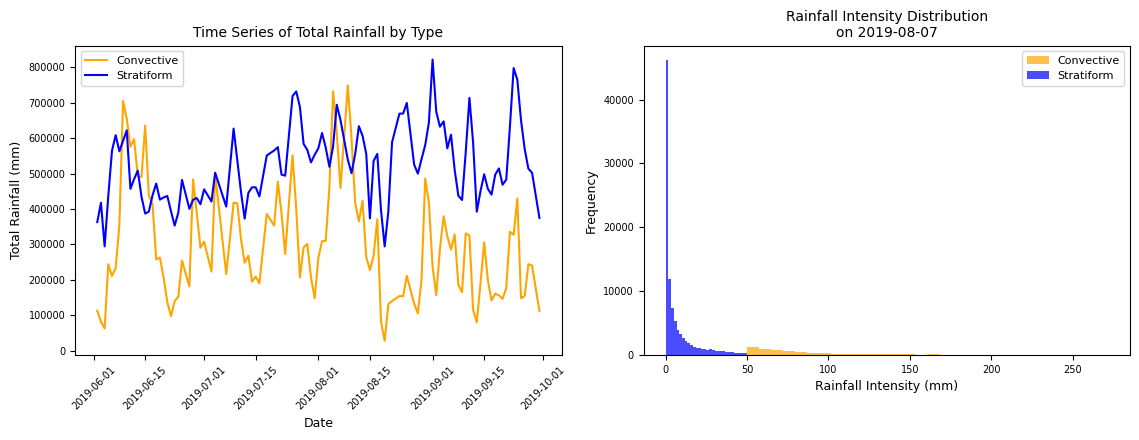

In [191]:
import matplotlib.pyplot as plt
import numpy as np

# --- Time Series Data (already computed) ---
dates = ds['time'].values
total_convective = []
total_stratiform = []

for t in dates:
    rain = ds['precipitationCal'].sel(time=t)
    conv = rain.where(rain > 50)
    strat = rain.where((rain > 0) & (rain <= 50))
    total_convective.append(np.nansum(conv))
    total_stratiform.append(np.nansum(strat))

# --- Histogram Data (already computed for selected date) ---
# Make sure convective and stratiform are defined for the chosen date
convective_vals = convective.values.flatten()
stratiform_vals = stratiform.values.flatten()
convective_vals = convective_vals[~np.isnan(convective_vals)]
stratiform_vals = stratiform_vals[~np.isnan(stratiform_vals)]

# --- Plot both in a single row ---
fig, axs = plt.subplots(1, 2, figsize=(11.5, 4.5))  # A4 width, compact height

# Time Series Plot
axs[0].plot(dates, total_convective, label='Convective', color='orange')
axs[0].plot(dates, total_stratiform, label='Stratiform', color='blue')
axs[0].set_xlabel('Date', fontsize=9)
axs[0].set_ylabel('Total Rainfall (mm)', fontsize=9)
axs[0].set_title('Time Series of Total Rainfall by Type', fontsize=10)
axs[0].legend(fontsize=8)
axs[0].tick_params(axis='x', labelrotation=45, labelsize=7)
axs[0].tick_params(axis='y', labelsize=7)

# Histogram Plot
axs[1].hist(convective_vals, bins=30, alpha=0.7, label='Convective', color='orange')
axs[1].hist(stratiform_vals, bins=30, alpha=0.7, label='Stratiform', color='blue')
axs[1].set_xlabel('Rainfall Intensity (mm)', fontsize=9)
axs[1].set_ylabel('Frequency', fontsize=9)
axs[1].set_title(f'Rainfall Intensity Distribution\non {date_of_interest}', fontsize=10)
axs[1].legend(fontsize=8)
axs[1].tick_params(axis='both', labelsize=7)

plt.tight_layout()
plt.show()


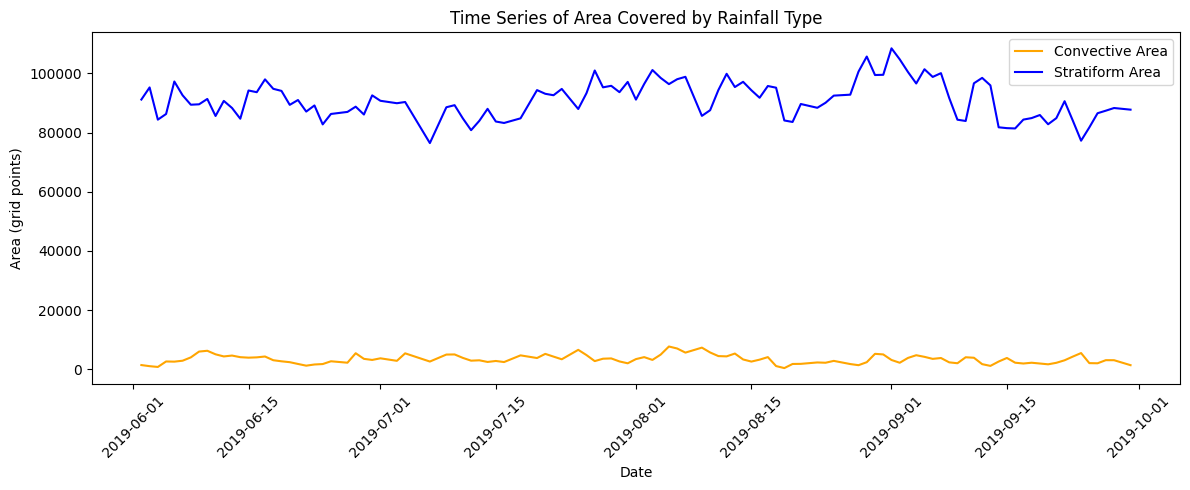

In [192]:
area_convective = []
area_stratiform = []

for t in dates:
    rain = ds['precipitationCal'].sel(time=t)
    conv = rain.where(rain > 50)
    strat = rain.where((rain > 0) & (rain <= 50))
    area_convective.append(np.count_nonzero(~np.isnan(conv)))
    area_stratiform.append(np.count_nonzero(~np.isnan(strat)))

plt.figure(figsize=(12, 5))
plt.plot(dates, area_convective, label='Convective Area', color='orange')
plt.plot(dates, area_stratiform, label='Stratiform Area', color='blue')
plt.xlabel('Date')
plt.ylabel('Area (grid points)')
plt.title('Time Series of Area Covered by Rainfall Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


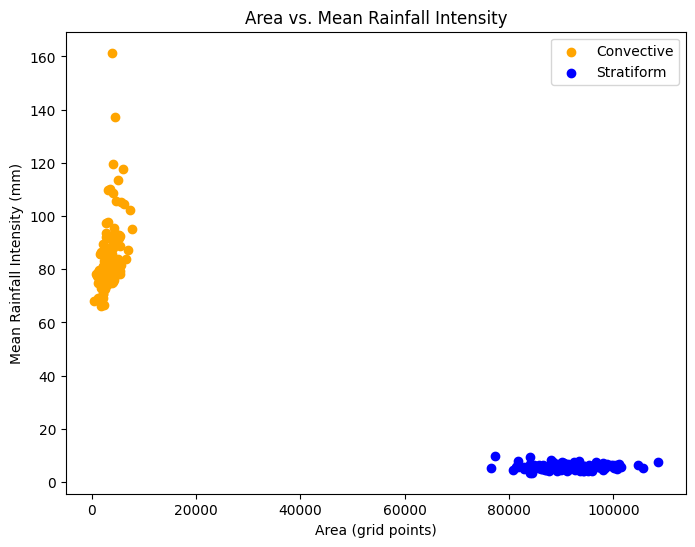

In [193]:
mean_convective = []
mean_stratiform = []

for t in dates:
    rain = ds['precipitationCal'].sel(time=t)
    conv = rain.where(rain > 50)
    strat = rain.where((rain > 0) & (rain <= 50))
    mean_convective.append(np.nanmean(conv))
    mean_stratiform.append(np.nanmean(strat))

plt.figure(figsize=(8, 6))
plt.scatter(area_convective, mean_convective, c='orange', label='Convective')
plt.scatter(area_stratiform, mean_stratiform, c='blue', label='Stratiform')
plt.xlabel('Area (grid points)')
plt.ylabel('Mean Rainfall Intensity (mm)')
plt.title('Area vs. Mean Rainfall Intensity')
plt.legend()
plt.show()


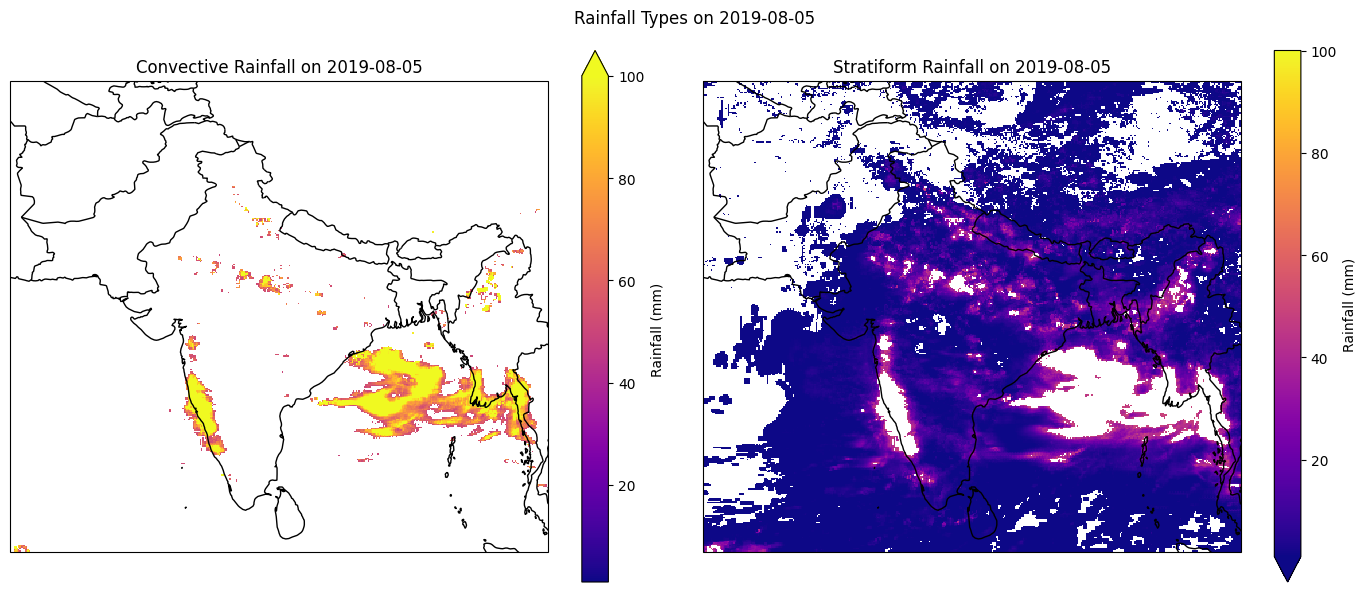

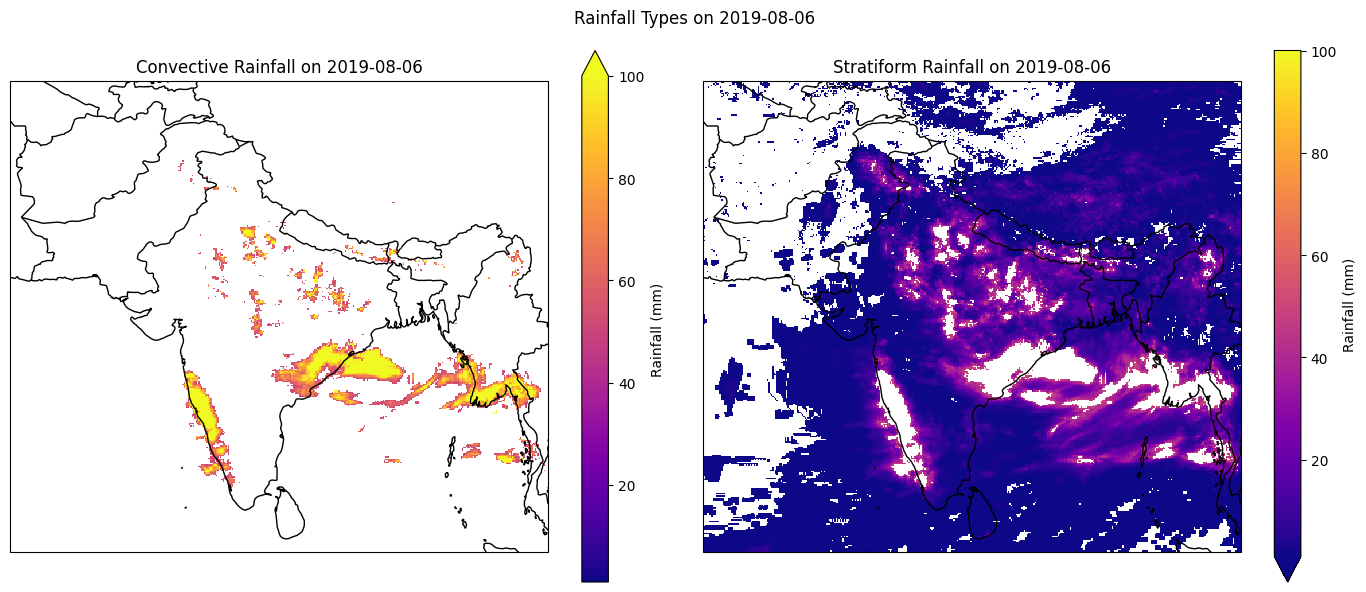

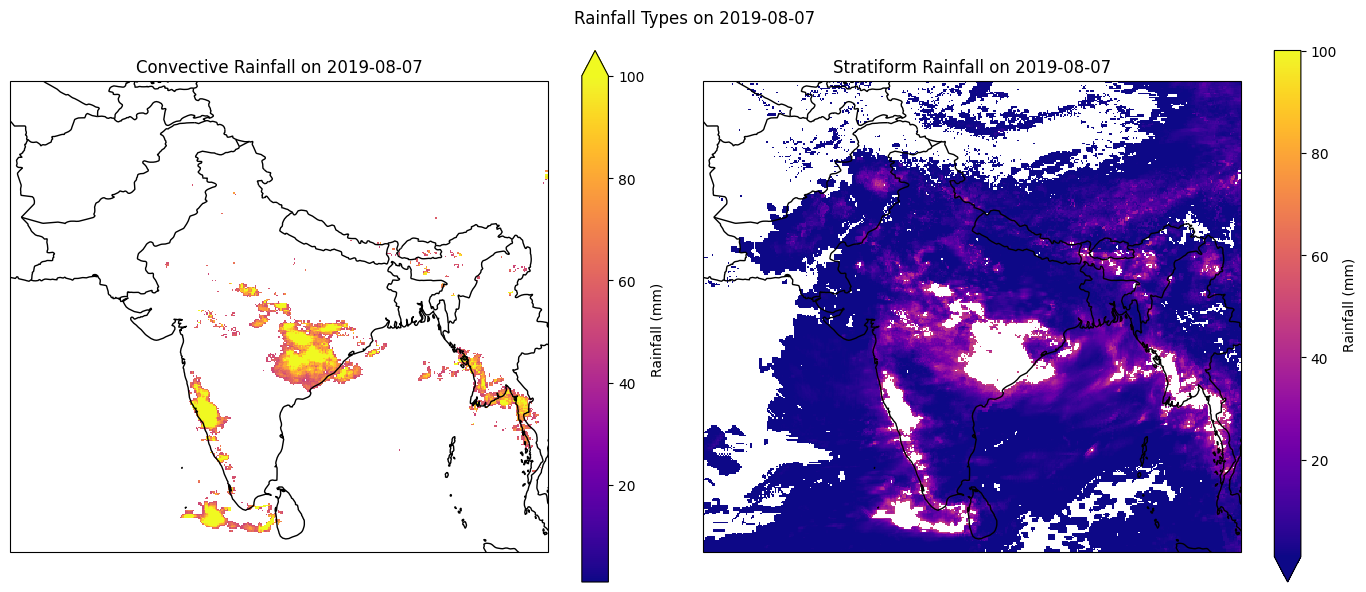

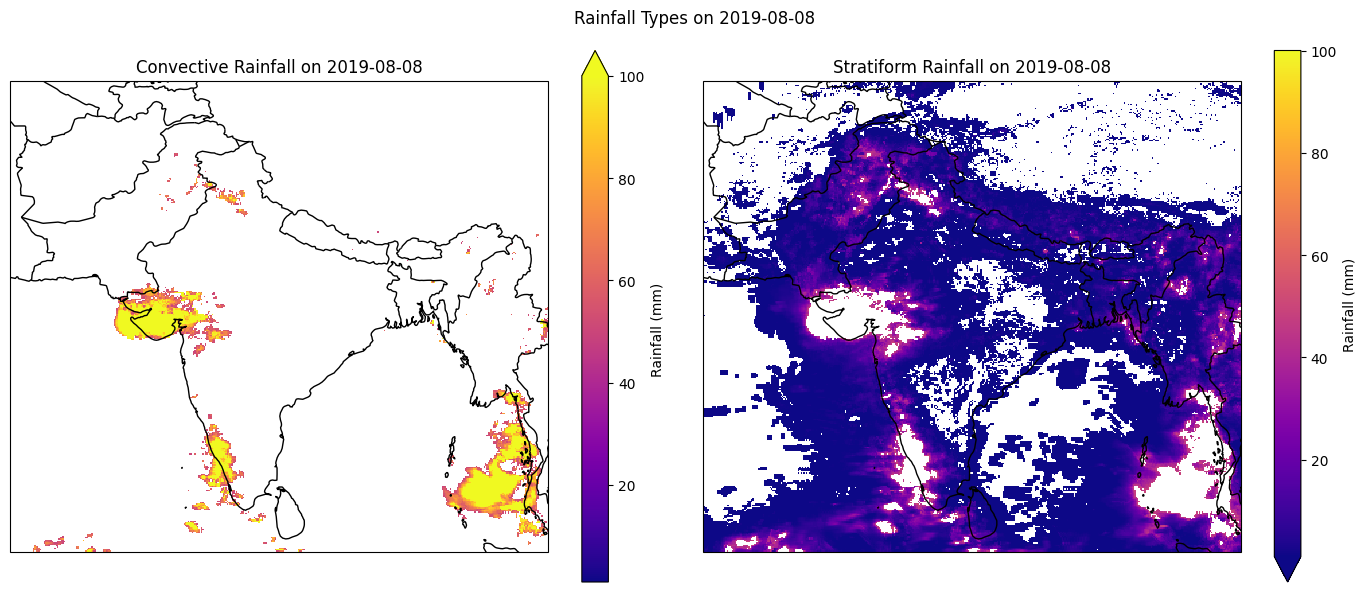

In [194]:
phase_dates = [
    np.datetime64('2019-08-05'),
    np.datetime64('2019-08-06'),
    np.datetime64('2019-08-07'),
    np.datetime64('2019-08-08')
]

for date in phase_dates:
    try:
        # Use nearest neighbor lookup
        rainfall = ds['precipitationCal'].sel(time=date, method='nearest').transpose('lat', 'lon')
    except KeyError:
        print(f"Skipping {date} (no data)")
        continue

    convective = rainfall.where(rainfall > 50)
    stratiform = rainfall.where((rainfall > 0) & (rainfall <= 50))

    fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    for ax, data, title in zip(axs, [convective, stratiform], ['Convective', 'Stratiform']):
        im = data.plot(
            ax=ax,
            cmap='plasma',
            vmin=1, vmax=100,
            cbar_kwargs={'label': 'Rainfall (mm)'},
            transform=ccrs.PlateCarree()
        )
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())
        ax.set_title(f"{title} Rainfall on {date}")
    plt.suptitle(f"Rainfall Types on {date}")
    plt.tight_layout()
    plt.show()

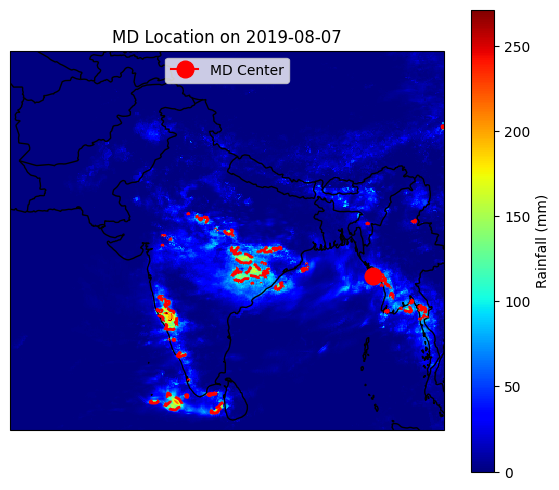

In [195]:
# Select the date of interest and extract rainfall data
date_of_interest = '2019-08-07'
rainfall = ds['precipitationCal'].sel(time=date_of_interest).transpose('lat', 'lon')

# Find cyclone center (maximum rainfall location)
max_idx = np.unravel_index(np.nanargmax(rainfall.values), rainfall.shape)
cyclone_lat = rainfall['lat'].values[max_idx[0]]
cyclone_lon = rainfall['lon'].values[max_idx[1]]

fig = plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot rainfall with 'jet' colormap (red for high values)
rain = ax.pcolormesh(
    rainfall['lon'], rainfall['lat'], rainfall,
    cmap='jet',  # 'jet' colormap includes red at high values
    vmin=0, vmax=np.nanmax(rainfall),
    shading='auto'
)
plt.colorbar(rain, ax=ax, label='Rainfall (mm)')

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())

# Mark the cyclone center with a red marker and label
ax.plot(cyclone_lon, cyclone_lat, marker='o', color='red', markersize=12, label='MD Center')
ax.legend(loc='upper center')

# Optionally, draw a contour for very high rainfall (e.g., 100 mm)
contour = ax.contour(
    rainfall['lon'], rainfall['lat'], rainfall,
    levels=[100], colors='red', linewidths=2, linestyles='dashed'
)
ax.clabel(contour, fmt='%d mm', colors='red', fontsize=8)

plt.title(f'MD Location on {date_of_interest}')
plt.show()

In [196]:
print(rainfall)
print(rainfall.dims)
print("Rainfall max:", rainfall.max().item())
print("Rainfall min:", rainfall.min().item())
print("Rainfall mean:", rainfall.mean().item())
print("Number of time steps:", rainfall.sizes.get('time', 'No time dimension'))


<xarray.DataArray 'precipitationCal' (lat: 351, lon: 401)> Size: 563kB
[140751 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 2kB 60.05 60.15 60.25 60.35 ... 99.85 99.95 100.1
  * lat      (lat) float32 1kB 4.95 5.05 5.15 5.25 ... 39.65 39.75 39.85 39.95
    time     datetime64[ns] 8B 2019-08-07
Attributes:
    long_name:     Daily accumulated precipitation (combined microwave-IR) es...
    units:         mm
    origname:      precipitationCal
    fullnamepath:  /precipitationCal
('lat', 'lon')
Rainfall max: 271.7172546386719
Rainfall min: 0.0
Rainfall mean: 7.899294853210449
Number of time steps: No time dimension


In [197]:
print(rainfall.values.min(), rainfall.values.max(), np.isnan(rainfall.values).sum())


0.0 271.71725 0


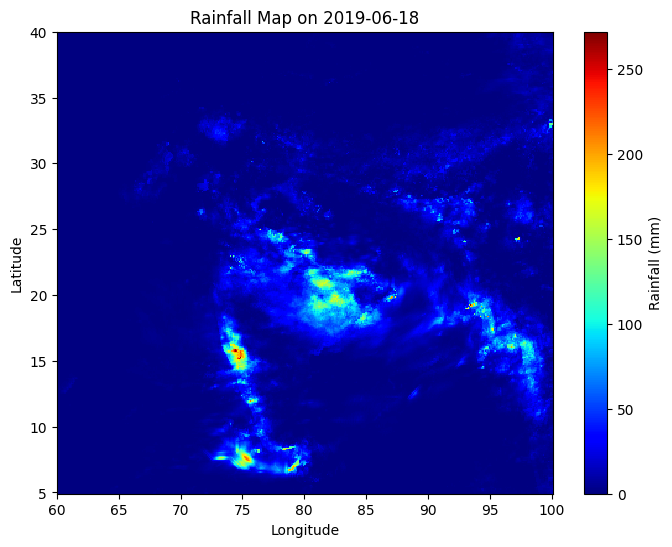

In [198]:
plt.figure(figsize=(8,6))
plt.pcolormesh(rainfall['lon'], rainfall['lat'], rainfall, cmap='jet')
plt.colorbar(label='Rainfall (mm)')
plt.title('Rainfall Map on 2019-06-18')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


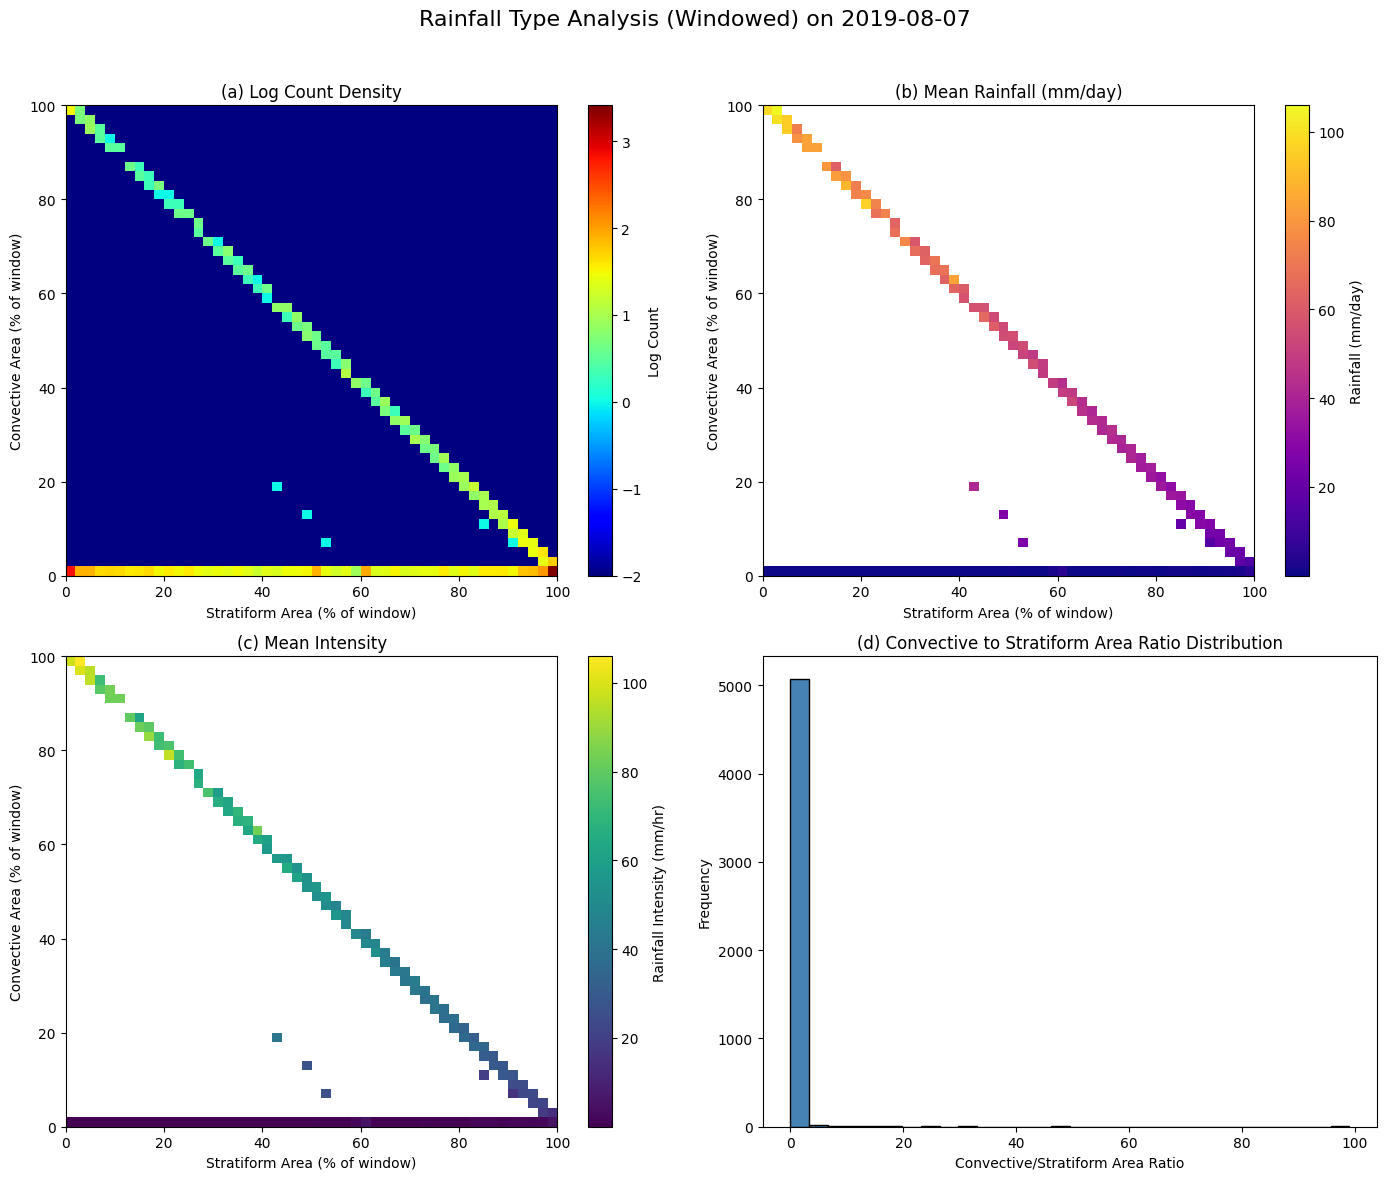

In [199]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from numpy.lib.stride_tricks import sliding_window_view

# Load data
ds = xr.open_dataset("merge_2019.nc")
date = '2019-08-07'
rainfall = ds['precipitationCal'].sel(time=date).transpose('lat', 'lon')

conv_mask = (rainfall > 50).values
strat_mask = ((rainfall > 0) & (rainfall <= 50)).values

window_size = 10
stride = 5

pad = window_size // 2
conv_padded = np.pad(conv_mask, pad, mode='constant', constant_values=0)
strat_padded = np.pad(strat_mask, pad, mode='constant', constant_values=0)
rain_padded = np.pad(rainfall.values, pad, mode='constant', constant_values=np.nan)

# Use sliding_window_view instead of view_as_windows
conv_windows = sliding_window_view(conv_padded, (window_size, window_size))[::stride, ::stride]
strat_windows = sliding_window_view(strat_padded, (window_size, window_size))[::stride, ::stride]
rain_windows = sliding_window_view(rain_padded, (window_size, window_size))[::stride, ::stride]

conv_area_pct = conv_windows.sum(axis=(-2, -1)) / (window_size**2) * 100
strat_area_pct = strat_windows.sum(axis=(-2, -1)) / (window_size**2) * 100
mean_rain = np.nanmean(rain_windows, axis=(-2, -1))

x = strat_area_pct.flatten()
y = conv_area_pct.flatten()
z = mean_rain.flatten()

with np.errstate(divide='ignore', invalid='ignore'):
    ratio = np.where(x != 0, y / x, np.nan)
ratio = ratio[~np.isnan(ratio)]

valid = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isnan(z))
x_valid = x[valid]
y_valid = y[valid]
z_valid = z[valid]

fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle(f"Rainfall Type Analysis (Windowed) on {date}", fontsize=16)

stat, xe, ye, binnum = binned_statistic_2d(x_valid, y_valid, None, bins=50, statistic='count')
pcm = axs[0, 0].pcolormesh(xe, ye, np.log10(stat.T + 1e-2), cmap='jet')
fig.colorbar(pcm, ax=axs[0, 0], label='Log Count')
axs[0, 0].set_title("(a) Log Count Density")
axs[0, 0].set_xlabel("Stratiform Area (% of window)")
axs[0, 0].set_ylabel("Convective Area (% of window)")

stat_rain, xe, ye, _ = binned_statistic_2d(x_valid, y_valid, z_valid, bins=50, statistic='mean')
pcm1 = axs[0, 1].pcolormesh(xe, ye, stat_rain.T, cmap='plasma')
fig.colorbar(pcm1, ax=axs[0, 1], label='Rainfall (mm/day)')
axs[0, 1].set_title("(b) Mean Rainfall (mm/day)")
axs[0, 1].set_xlabel("Stratiform Area (% of window)")
axs[0, 1].set_ylabel("Convective Area (% of window)")

pcm2 = axs[1, 0].pcolormesh(xe, ye, stat_rain.T, cmap='viridis')
fig.colorbar(pcm2, ax=axs[1, 0], label='Rainfall Intensity (mm/hr)')
axs[1, 0].set_title("(c) Mean Intensity")
axs[1, 0].set_xlabel("Stratiform Area (% of window)")
axs[1, 0].set_ylabel("Convective Area (% of window)")

axs[1, 1].hist(ratio, bins=30, color='steelblue', edgecolor='black')
axs[1, 1].set_title("(d) Convective to Stratiform Area Ratio Distribution")
axs[1, 1].set_xlabel("Convective/Stratiform Area Ratio")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



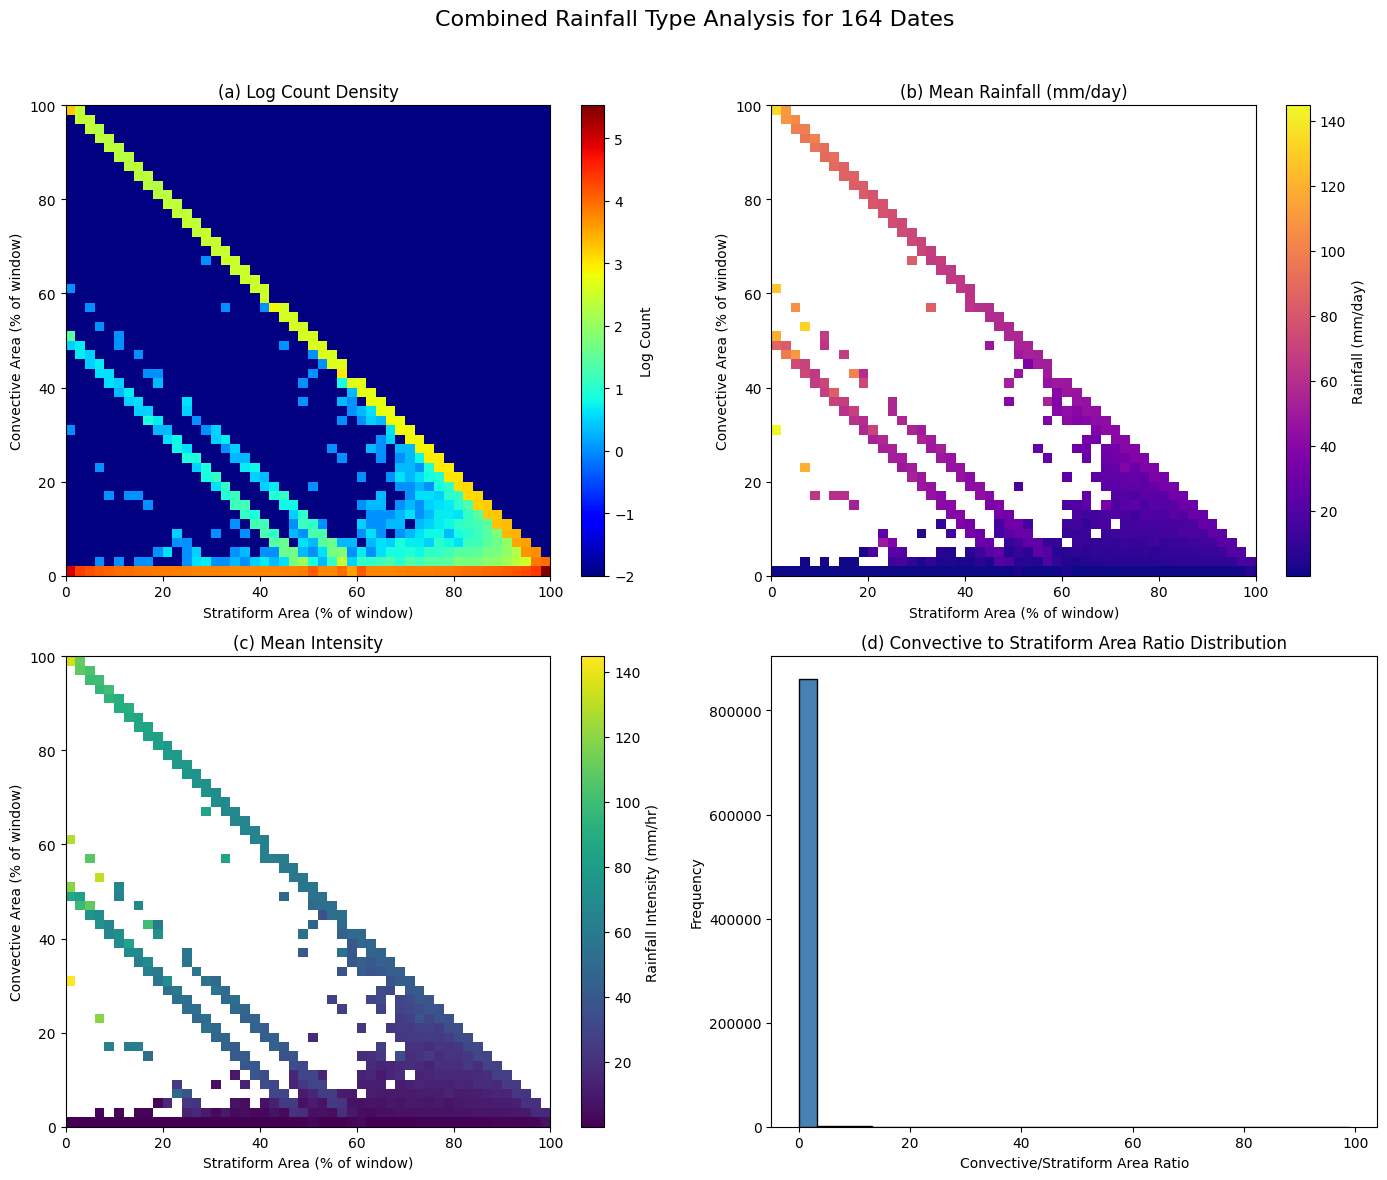

In [200]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from numpy.lib.stride_tricks import sliding_window_view

# Load multi-year dataset
ds = xr.open_mfdataset("merge_20*.nc", combine='by_coords', chunks={'time': 10})

# Select dates to analyze (example: all August days across all years)
selected_dates = ds['time'].sel(time=ds.time.dt.month == 7).values  # Use as many dates as you want
# selected_dates = ds['time'].sel(time=ds.time.dt.month == 7).values[:3]

# Parameters
window_size = 10
stride = 5
pad = window_size // 2

# Lists to collect all data
x_all = []
y_all = []
z_all = []
ratio_all = []

# Loop through dates and collect windowed data
for date in selected_dates:
    rainfall = ds['precipitationCal'].sel(time=date).transpose('lat', 'lon')
    conv_mask = (rainfall > 50).values
    strat_mask = ((rainfall > 0) & (rainfall <= 50)).values

    conv_padded = np.pad(conv_mask, pad, mode='constant', constant_values=0)
    strat_padded = np.pad(strat_mask, pad, mode='constant', constant_values=0)
    rain_padded = np.pad(rainfall.values, pad, mode='constant', constant_values=np.nan)

    conv_windows = sliding_window_view(conv_padded, (window_size, window_size))[::stride, ::stride]
    strat_windows = sliding_window_view(strat_padded, (window_size, window_size))[::stride, ::stride]
    rain_windows = sliding_window_view(rain_padded, (window_size, window_size))[::stride, ::stride]

    conv_area_pct = conv_windows.sum(axis=(-2, -1)) / (window_size**2) * 100
    strat_area_pct = strat_windows.sum(axis=(-2, -1)) / (window_size**2) * 100
    mean_rain = np.nanmean(rain_windows, axis=(-2, -1))

    x = strat_area_pct.flatten()
    y = conv_area_pct.flatten()
    z = mean_rain.flatten()

    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = np.where(x != 0, y / x, np.nan)
    ratio = ratio[~np.isnan(ratio)]

    valid = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isnan(z))
    x_valid = x[valid]
    y_valid = y[valid]
    z_valid = z[valid]

    x_all.append(x_valid)
    y_all.append(y_valid)
    z_all.append(z_valid)
    ratio_all.append(ratio)

# Concatenate all collected data
x_all = np.concatenate(x_all)
y_all = np.concatenate(y_all)
z_all = np.concatenate(z_all)
ratio_all = np.concatenate(ratio_all)

# Plotting (single figure for all dates)
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle(f"Combined Rainfall Type Analysis for {len(selected_dates)} Dates", fontsize=16)

stat, xe, ye, binnum = binned_statistic_2d(x_all, y_all, None, bins=50, statistic='count')
pcm = axs[0, 0].pcolormesh(xe, ye, np.log10(stat.T + 1e-2), cmap='jet')
fig.colorbar(pcm, ax=axs[0, 0], label='Log Count')
axs[0, 0].set_title("(a) Log Count Density")
axs[0, 0].set_xlabel("Stratiform Area (% of window)")
axs[0, 0].set_ylabel("Convective Area (% of window)")

stat_rain, xe, ye, _ = binned_statistic_2d(x_all, y_all, z_all, bins=50, statistic='mean')
pcm1 = axs[0, 1].pcolormesh(xe, ye, stat_rain.T, cmap='plasma')
fig.colorbar(pcm1, ax=axs[0, 1], label='Rainfall (mm/day)')
axs[0, 1].set_title("(b) Mean Rainfall (mm/day)")
axs[0, 1].set_xlabel("Stratiform Area (% of window)")
axs[0, 1].set_ylabel("Convective Area (% of window)")

pcm2 = axs[1, 0].pcolormesh(xe, ye, stat_rain.T, cmap='viridis')
fig.colorbar(pcm2, ax=axs[1, 0], label='Rainfall Intensity (mm/hr)')
axs[1, 0].set_title("(c) Mean Intensity")
axs[1, 0].set_xlabel("Stratiform Area (% of window)")
axs[1, 0].set_ylabel("Convective Area (% of window)")

axs[1, 1].hist(ratio_all, bins=30, color='steelblue', edgecolor='black')
axs[1, 1].set_title("(d) Convective to Stratiform Area Ratio Distribution")
axs[1, 1].set_xlabel("Convective/Stratiform Area Ratio")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Panel (a): Log Count Density
What it shows:
This plot displays the density (on a log scale) of how often each combination of stratiform and convective area percentages occurs within your moving windows across the domain.

What you see:
The data are almost exclusively along the axes and the diagonal, with most bins empty (dark blue), indicating that in almost all windows, either convective or stratiform area is close to 0% or 100%, and rarely do both coexist in significant amounts in the same window.

Panel (b): Mean Rainfall (mm/day)
What it shows:
The average rainfall in each bin of stratiform vs. convective area percentages.

What you see:
High mean rainfall is associated with windows dominated by either convective or stratiform area, but not both. The diagonal line indicates that windows are almost always dominated by one type, not a mix, and rainfall intensity increases with the dominance of either.

Panel (c): Mean Intensity
What it shows:
Similar to (b), this is the mean rainfall intensity (mm/hr) for each bin.

What you see:
The pattern matches (b), confirming that high intensity is found where one type dominates, not where both are present.

Panel (d): Convective to Stratiform Area Ratio Distribution
What it shows:
The histogram of the ratio of convective to stratiform area percentages across all windows.

What you see:
The vast majority of windows have a very low ratio (close to zero), meaning most windows are either all stratiform or all convective, but not both. There are very few windows with a balanced mix.

Feedback and Interpretation
Your code and methodology are correct:
The diagrams are technically sound, and the windowed approach is the right way to analyze spatial rainfall structure.

What the diagrams reveal about your data:

Rainfall is highly segregated: Most windows are dominated by either convective or stratiform rainfall, not a mix. This is typical for many real-world tropical cyclone or monsoon events, where convective cores and stratiform shields are spatially separated.

Sparse mixing: The lack of filled bins away from the axes/diagonal means that few windows contain both significant convective and stratiform rainfall at once.

Histogram spike at zero: Most windows have either no convective or no stratiform area, so the ratio is zero for most.

Is this expected?
Yes, for many rainfall events, especially in the tropics or with organized systems, rainfall types are spatially segregated (see , ). Only in mature mesoscale convective systems (MCSs) do you often see more mixing in the same window.

How to improve or further analyze:

Try different window sizes: A larger window may capture more mixed-type rainfall.

Focus on specific regions: Subset to the cyclone core or stratiform shield to see more detail.

Check other events: Some events may have more overlap between convective and stratiform types.

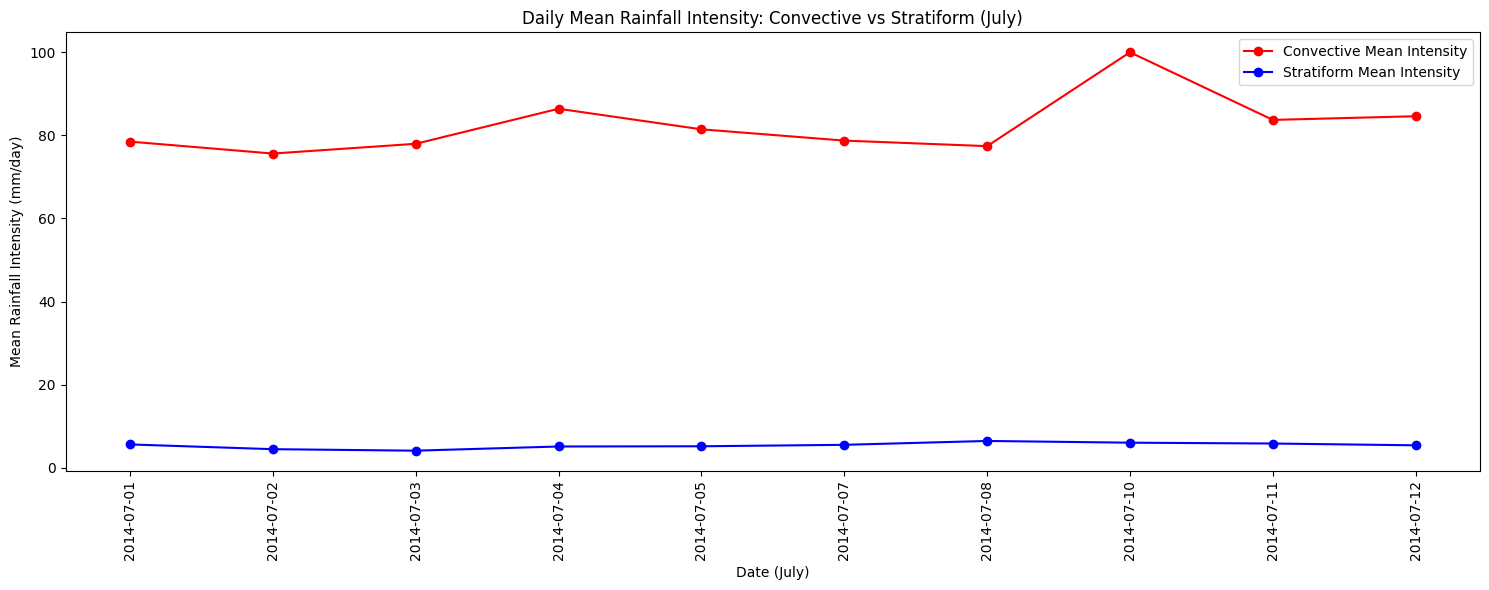

In [201]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load all data
ds = xr.open_mfdataset("merge_20*.nc", combine='by_coords', chunks={'time': 10})

# Select all July dates
july_dates = ds['time'].sel(time=ds.time.dt.month == 7).values[:10]

conv_means = []
strat_means = []
date_labels = []

for date in july_dates:
    rainfall = ds['precipitationCal'].sel(time=date)
    conv_mask = (rainfall > 50)
    strat_mask = ((rainfall > 0) & (rainfall <= 50))
    
    # Mean intensity for convective and stratiform
    conv_mean = float(rainfall.where(conv_mask).mean().values)
    strat_mean = float(rainfall.where(strat_mask).mean().values)
    
    conv_means.append(conv_mean)
    strat_means.append(strat_mean)
    date_labels.append(str(date)[:10])

plt.figure(figsize=(15,6))
plt.plot(date_labels, conv_means, label="Convective Mean Intensity", color='red', marker='o')
plt.plot(date_labels, strat_means, label="Stratiform Mean Intensity", color='blue', marker='o')
plt.xticks(rotation=90)
plt.ylabel("Mean Rainfall Intensity (mm/day)")
plt.xlabel("Date (July)")
plt.title("Daily Mean Rainfall Intensity: Convective vs Stratiform (July)")
plt.legend()
plt.tight_layout()
plt.show()


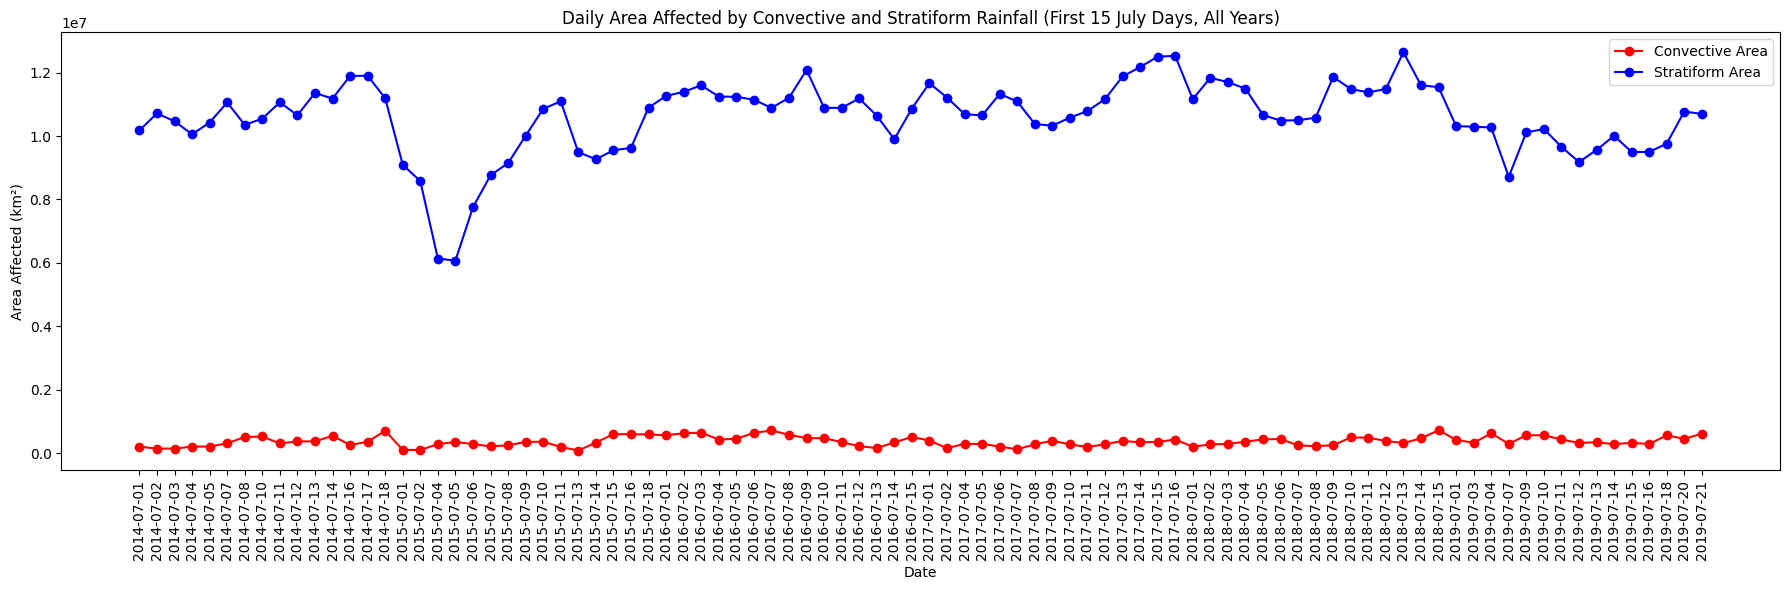

In [202]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

ds = xr.open_mfdataset("merge_20*.nc", combine='by_coords', chunks={'time': 10})

# Get all unique years in your dataset
years = np.unique(ds['time'].dt.year.values)

# Collect first 15 July dates for each year
selected_dates = []
for year in years:
    july_dates_this_year = ds['time'].sel(time=((ds['time'].dt.year == year) & (ds['time'].dt.month == 7)))
    selected_dates += list(july_dates_this_year.values[:15])
selected_dates = sorted(selected_dates)

conv_areas = []
strat_areas = []
date_labels = []

R = 6371.0

for date in selected_dates:
    rainfall = ds['precipitationCal'].sel(time=date).transpose('lat', 'lon')
    conv_mask = (rainfall > 50).values
    strat_mask = ((rainfall > 0) & (rainfall <= 50)).values
    lat = rainfall['lat'].values
    lon = rainfall['lon'].values
    lat_res = np.abs(lat[1] - lat[0])
    lon_res = np.abs(lon[1] - lon[0])
    lat_rad = np.deg2rad(lat)
    delta_lat_rad = np.deg2rad(lat_res)
    delta_lon_rad = np.deg2rad(lon_res)
    area_per_lat = (R**2) * delta_lat_rad * delta_lon_rad * np.cos(lat_rad)
    grid_cell_area = np.repeat(area_per_lat[:, np.newaxis], len(lon), axis=1)
    conv_area = np.sum(grid_cell_area[conv_mask])
    strat_area = np.sum(grid_cell_area[strat_mask])
    conv_areas.append(conv_area)
    strat_areas.append(strat_area)
    date_labels.append(str(date)[:10])

plt.figure(figsize=(18, 6))
plt.plot(date_labels, conv_areas, label="Convective Area", color='red', marker='o')
plt.plot(date_labels, strat_areas, label="Stratiform Area", color='blue', marker='o')
plt.xticks(rotation=90)
plt.ylabel("Area Affected (km²)")
plt.xlabel("Date")
plt.title("Daily Area Affected by Convective and Stratiform Rainfall (First 15 July Days, All Years)")
plt.legend()
plt.tight_layout()
plt.show()


In [203]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
import pandas as pd

# Load dataset
ds = xr.open_mfdataset("merge_20*.nc", combine='by_coords', chunks={'time': 10})

# Constants
RAIN_THRESHOLD = 100  # mm/day
MIN_AREA_KM2 = 50_000  # km²

# Get lat/lon
lat = ds['lat'].values
lon = ds['lon'].values

# Calculate grid cell area
R = 6371.0  # Earth radius in km
lat_res = np.abs(lat[1] - lat[0])
lon_res = np.abs(lon[1] - lon[0])
lat_rad = np.deg2rad(lat)
dlat = np.deg2rad(lat_res)
dlon = np.deg2rad(lon_res)
area_per_lat = (R**2) * dlat * dlon * np.cos(lat_rad)
grid_cell_area = np.repeat(area_per_lat[:, np.newaxis], len(lon), axis=1)

# Track systems
systems = []

for i in range(len(ds['time'])):
    time = ds['time'].values[i]
    rain = ds['precipitationCal'].isel(time=i).squeeze()  # removes singleton dimension

    if rain.dims != ('lat', 'lon'):
        rain = rain.transpose('lat', 'lon')  # Ensure shape

    rain_vals = rain.values
    mask = rain_vals > RAIN_THRESHOLD

    labeled, num_features = label(mask)

    for label_id in range(1, num_features + 1):
        region = labeled == label_id
        area = np.sum(grid_cell_area[region])
        if area >= MIN_AREA_KM2:
            y, x = np.where(region)
            centroid_lat = lat[int(np.mean(y))]
            centroid_lon = lon[int(np.mean(x))]
            systems.append({
                'time': np.datetime_as_string(time, unit='s'),
                'lat': centroid_lat,
                'lon': centroid_lon,
                'area_km2': area,
                'label_id': label_id
            })

# Convert to DataFrame
df = pd.DataFrame(systems)
print(df.head())

                  time        lat        lon       area_km2  label_id
0  2014-06-09T00:00:00  13.550000  66.450012  122303.625000        25
1  2014-06-10T00:00:00  15.149999  66.650009  131854.281250        10
2  2014-06-12T00:00:00  13.149999  93.850021  219240.750000        10
3  2014-06-12T00:00:00  17.549999  63.350002   58225.878906        41
4  2014-06-16T00:00:00  15.450002  92.449997   79941.562500        24


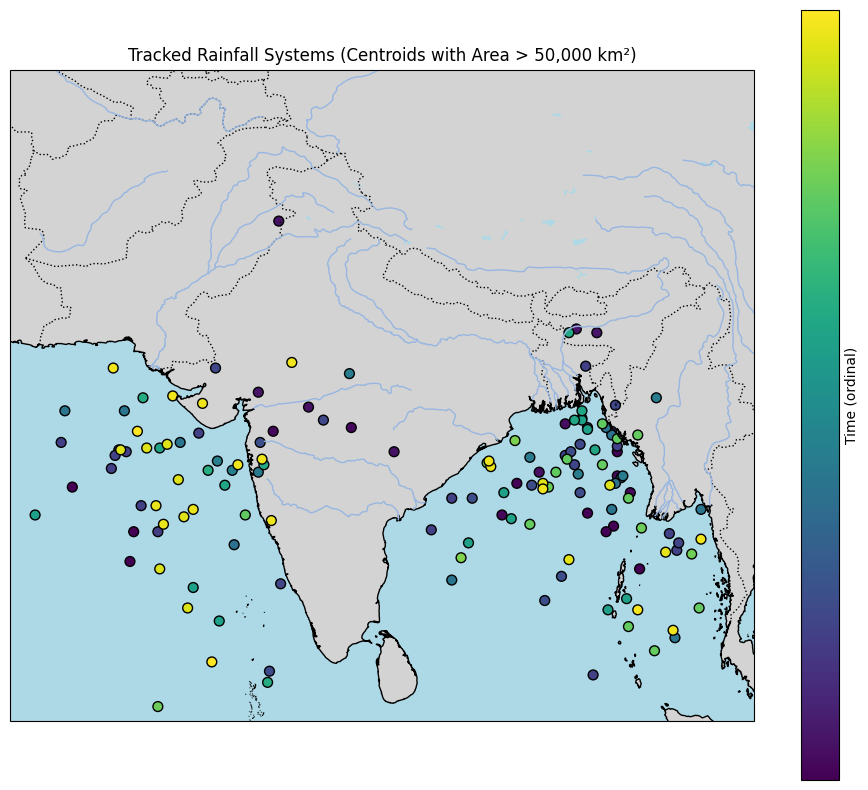

In [204]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Plot setup
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add base features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

# Optional: zoom into South Asia
ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())

# Plot system centroids
sc = ax.scatter(df['lon'], df['lat'],
                c=pd.to_datetime(df['time']).map(lambda d: d.toordinal()),  # color by time
                cmap='viridis', s=50, edgecolor='black', transform=ccrs.PlateCarree())

# Colorbar for time
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Time (ordinal)')
cbar.set_ticks([])

# Title and labels
plt.title("Tracked Rainfall Systems (Centroids with Area > 50,000 km²)")
plt.show()


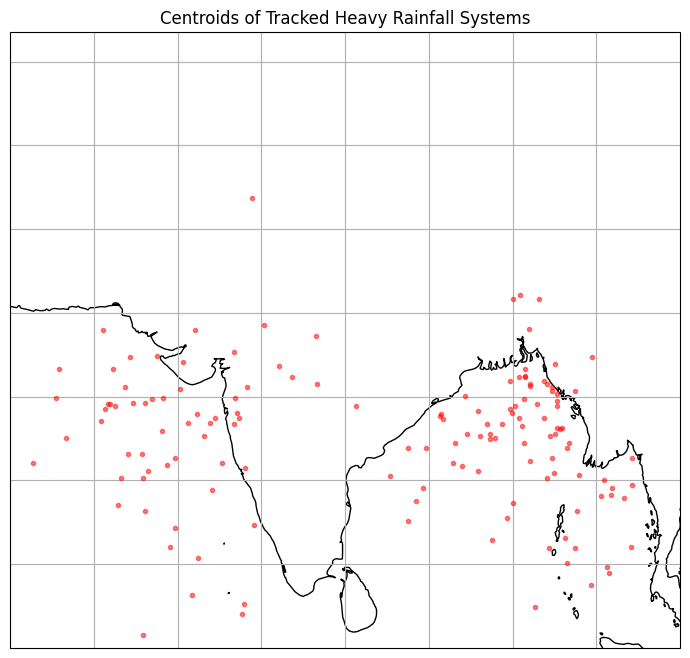

In [205]:
import cartopy.crs as ccrs

# Create a map
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([60, 100, 5, 40])  # Focus on India and surrounding regions

# Plot each system's centroid
for _, row in df.iterrows():
    ax.plot(row['lon'], row['lat'], 'ro', markersize=3, alpha=0.5)

plt.title("Centroids of Tracked Heavy Rainfall Systems")
plt.show()


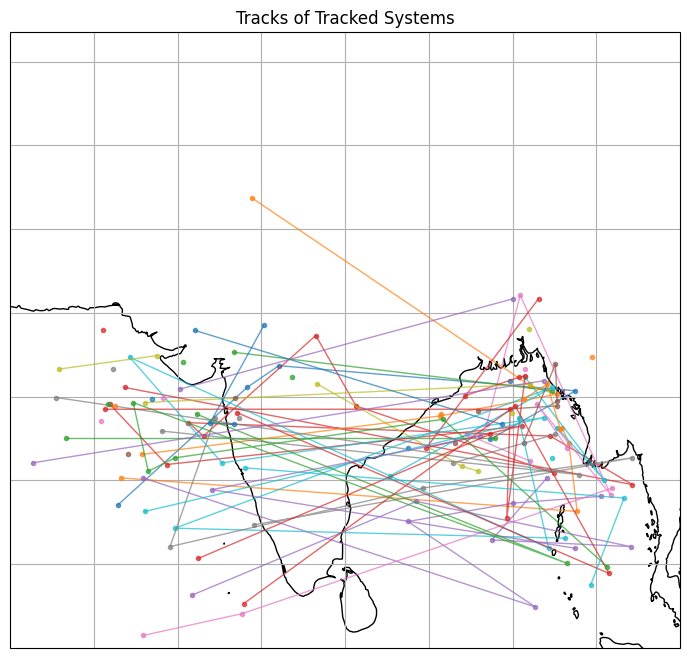

In [206]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([60, 100, 5, 40])

for label_id in df['label_id'].unique():
    track = df[df['label_id'] == label_id]
    ax.plot(track['lon'], track['lat'], marker='o', markersize=3, linewidth=1, alpha=0.7)

plt.title("Tracks of Tracked Systems")
plt.show()


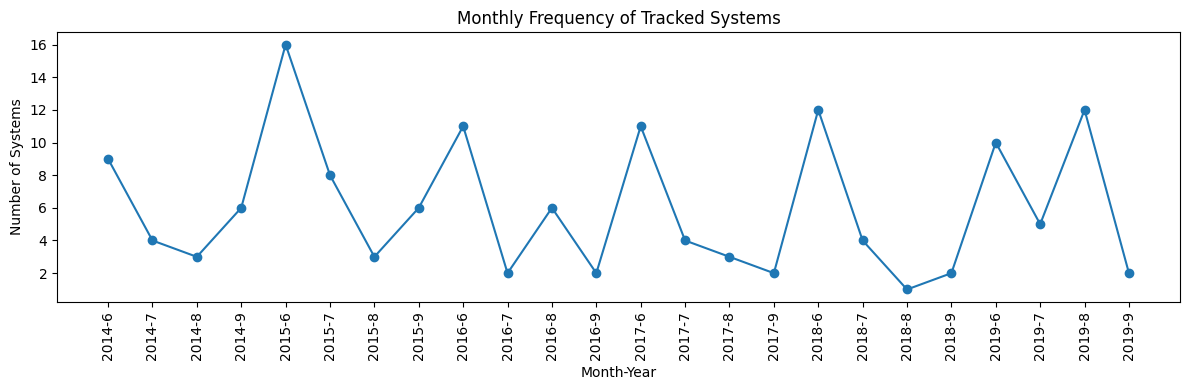

In [207]:
# Convert time to datetime
df['time'] = pd.to_datetime(df['time'])

# Extract year and month
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

# Count systems per month-year
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(12, 4))
plt.plot(monthly_counts['year'].astype(str) + '-' + monthly_counts['month'].astype(str), 
         monthly_counts['count'], 'o-')
plt.xticks(rotation=90)
plt.xlabel("Month-Year")
plt.ylabel("Number of Systems")
plt.title("Monthly Frequency of Tracked Systems")
plt.tight_layout()
plt.show()


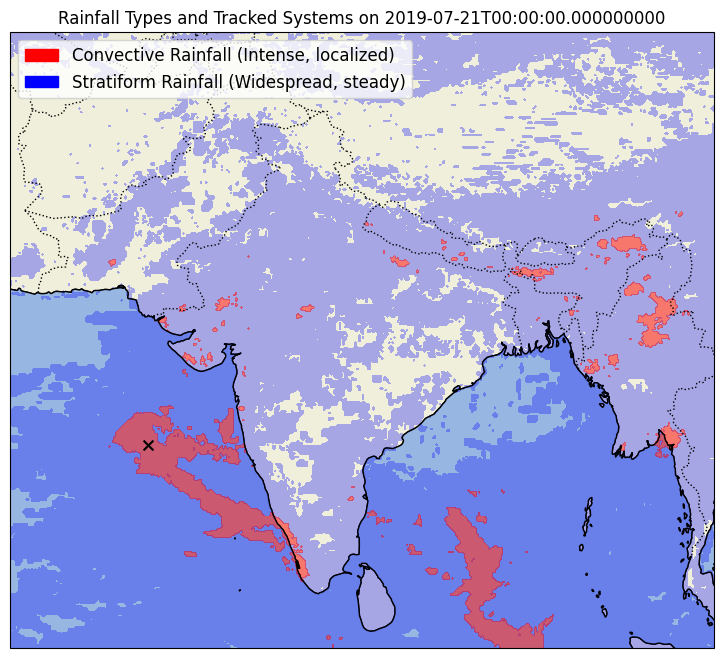

In [208]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Create a map with PlateCarree projection
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the region of interest
ax.set_extent([60, 100, 5, 40], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)

# Plot stratiform and convective rainfall masks
ax.contourf(lon, lat, strat_mask, levels=[0.5, 1], colors='blue', alpha=0.3, transform=ccrs.PlateCarree())
ax.contourf(lon, lat, conv_mask, levels=[0.5, 1], colors='red', alpha=0.5, transform=ccrs.PlateCarree())

# Plot system centroids for this date
systems_today = df[df['time'] == date]
ax.scatter(systems_today['lon'], systems_today['lat'], color='black', s=50, marker='x', label='System Centroids', transform=ccrs.PlateCarree())

# Add legend and title
ax.legend(loc='upper right')
ax.set_title(f"Rainfall Types and Tracked Systems on {date}")
conv_patch = mpatches.Patch(color='red', label='Convective Rainfall (Intense, localized)')
strat_patch = mpatches.Patch(color='blue', label='Stratiform Rainfall (Widespread, steady)')

# Add legend to your map plot
plt.legend(handles=[conv_patch, strat_patch], loc='upper left', fontsize=12, frameon=True)

plt.show()



In [209]:
df.to_csv("tracked_systems.csv", index=False)


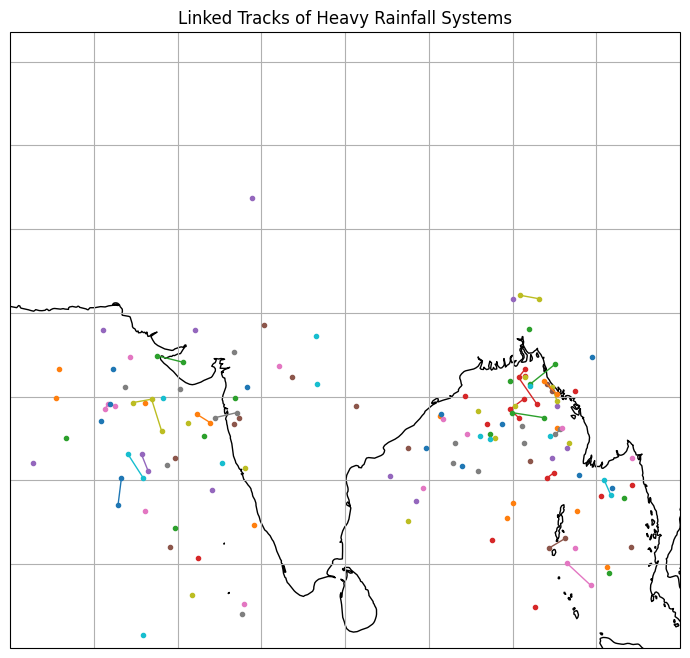

In [210]:
from scipy.spatial.distance import cdist

# Sort by time
df = df.sort_values('time')

# Initialize track IDs
df['track_id'] = -1
current_track_id = 0

# Link tracks
for i in range(len(df)):
    if df.iloc[i]['track_id'] == -1:
        current_track_id += 1
        df.at[i, 'track_id'] = current_track_id
        current_lon = df.iloc[i]['lon']
        current_lat = df.iloc[i]['lat']
        
        # Look ahead to next days
        for j in range(i+1, len(df)):
            next_time = df.iloc[j]['time']
            time_diff = (pd.to_datetime(next_time) - pd.to_datetime(df.iloc[i]['time'])).days
            if time_diff > 2:  # Max 2-day gap
                break
                
            dist = np.sqrt((current_lon - df.iloc[j]['lon'])**2 + (current_lat - df.iloc[j]['lat'])**2)
            if dist < 2.0:  # ~2 degrees (~200 km at equator)
                df.at[j, 'track_id'] = current_track_id
                current_lon = df.iloc[j]['lon']
                current_lat = df.iloc[j]['lat']

# Plot tracks by track_id
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.set_extent([60, 100, 5, 40])

for track_id in df['track_id'].unique():
    track = df[df['track_id'] == track_id]
    ax.plot(track['lon'], track['lat'], marker='o', markersize=3, linewidth=1)

plt.title("Linked Tracks of Heavy Rainfall Systems")
plt.show()


In [211]:
import pandas as pd

# Load the CSV file
depression_df = pd.read_csv('Best_T_2014.csv', encoding='latin1')

# Print column names
print("Columns in CSV:", depression_df.columns.tolist())


Columns in CSV: ['Serial Number of system during year', 'Basin of origin', 'Name', 'Date(DD-MM-YYYY)', 'Time (UTC)', 'Latitude (lat)', 'longitude  (Long)', 'CI No [or "T. No"]', 'Estimated Central Pressure (hPa) [or "E.C.P"]', 'Maximum Sustained Surface Wind (kt) ', 'Pressure Drop (hPa)[or "delta P"]', 'Grade (text)', 'Outermost closed isobar (hPa)', 'Diameter/Size of outermost closed isobar(in degree)']


In [212]:
import pandas as pd
import xarray as xr

# Load CSV with error handling
depression_df = pd.read_csv('Best_T_2014.csv', encoding='latin1')

# Convert columns to numeric, coercing errors to NaN
depression_df['Latitude (lat)'] = pd.to_numeric(depression_df['Latitude (lat)'], errors='coerce')
depression_df['longitude  (Long)'] = pd.to_numeric(depression_df['longitude  (Long)'], errors='coerce')

# Drop rows with invalid lat/lon
depression_df_clean = depression_df.dropna(subset=['Latitude (lat)', 'longitude  (Long)'])


In [213]:
# Parse datetime with error handling
def parse_time(row):
    try:
        time_str = str(row['Time (UTC)']).zfill(4)
        datetime_str = f"{row['Date(DD-MM-YYYY)']} {time_str}"
        return pd.to_datetime(datetime_str, format='%d-%m-%Y %H%M')
    except:
        return pd.NaT  # Not-a-Time for invalid entries

depression_df_clean['time'] = depression_df_clean.apply(parse_time, axis=1)
depression_df_clean = depression_df_clean.dropna(subset=['time'])


C:\Users\HONOR\AppData\Local\Temp\ipykernel_25044\1537258935.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_df_clean['time'] = depression_df_clean.apply(parse_time, axis=1)


In [214]:
# Load GPM data
gpm_ds = xr.open_dataset('merge_2014.nc')

# Loop through cleaned data
for idx, row in depression_df_clean.iterrows():
    lat = row['Latitude (lat)']
    lon = row['longitude  (Long)']
    time = row['time']
    
    try:
        # Find nearest GPM time
        gpm_time = gpm_ds['time'].sel(time=time, method='nearest')
        # Extract rainfall
        rain = gpm_ds['precipitationCal'].sel(
            lat=lat, lon=lon, time=gpm_time, method='nearest'
        ).values
        print(f"Rainfall at depression center on {time.strftime('%Y-%m-%d %H:%M')}: {rain:.2f} mm")
    except Exception as e:
        print(f"Error processing row {idx}: {e}")


Rainfall at depression center on 2014-01-04 03:00: 4.61 mm
Rainfall at depression center on 2014-01-04 06:00: 4.77 mm
Rainfall at depression center on 2014-01-04 12:00: 4.77 mm
Rainfall at depression center on 2014-01-04 18:00: 0.85 mm
Rainfall at depression center on 2014-01-05 00:00: 0.00 mm
Rainfall at depression center on 2014-01-05 03:00: 0.00 mm
Rainfall at depression center on 2014-01-05 06:00: 0.00 mm
Rainfall at depression center on 2014-01-05 12:00: 0.00 mm
Rainfall at depression center on 2014-01-05 18:00: 0.00 mm
Rainfall at depression center on 2014-01-06 00:00: 0.00 mm
Rainfall at depression center on 2014-01-06 03:00: 0.00 mm
Rainfall at depression center on 2014-01-06 06:00: 0.00 mm
Rainfall at depression center on 2014-01-06 12:00: 0.00 mm
Rainfall at depression center on 2014-01-07 00:00: 0.03 mm
Rainfall at depression center on 2014-05-21 03:00: 0.12 mm
Rainfall at depression center on 2014-05-21 06:00: 0.00 mm
Rainfall at depression center on 2014-05-21 12:00: 0.11 

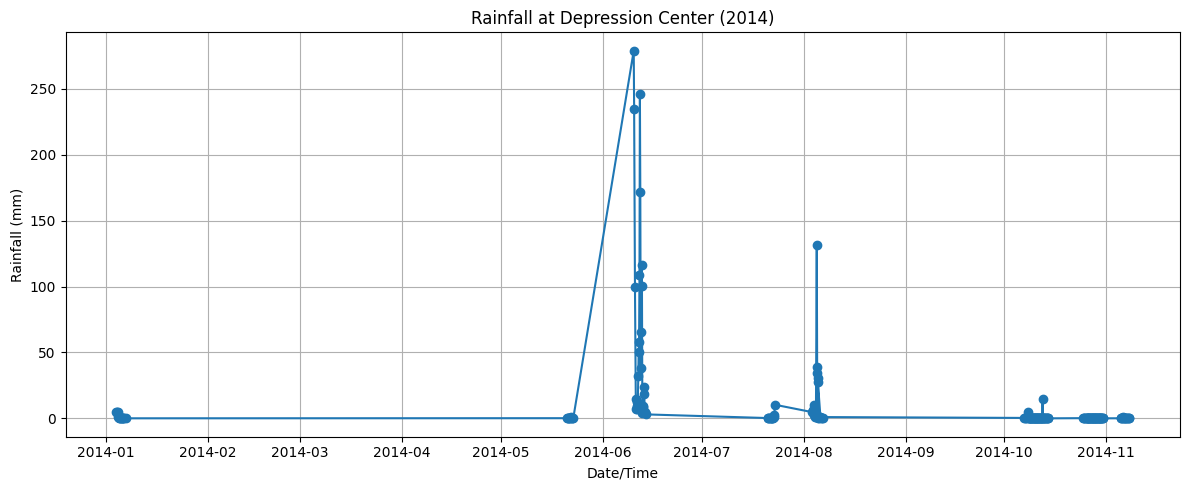

In [215]:
import matplotlib.pyplot as plt

# Assuming you collected results in lists:
times = []
rainfalls = []

for idx, row in depression_df_clean.iterrows():
    lat = row['Latitude (lat)']
    lon = row['longitude  (Long)']
    time = row['time']
    try:
        gpm_time = gpm_ds['time'].sel(time=time, method='nearest')
        rain = gpm_ds['precipitationCal'].sel(
            lat=lat, lon=lon, time=gpm_time, method='nearest'
        ).values
        times.append(time)
        rainfalls.append(rain)
    except Exception as e:
        continue

plt.figure(figsize=(12,5))
plt.plot(times, rainfalls, marker='o')
plt.title('Rainfall at Depression Center (2014)')
plt.xlabel('Date/Time')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [216]:
for t, r in zip(times, rainfalls):
    if r > 50:
        print(f"Extreme rainfall at {t}: {r:.2f} mm")


Extreme rainfall at 2014-06-10 09:00:00: 279.05 mm
Extreme rainfall at 2014-06-10 12:00:00: 234.82 mm
Extreme rainfall at 2014-06-10 18:00:00: 99.71 mm
Extreme rainfall at 2014-06-11 21:00:00: 50.05 mm
Extreme rainfall at 2014-06-12 00:00:00: 58.25 mm
Extreme rainfall at 2014-06-12 03:00:00: 108.60 mm
Extreme rainfall at 2014-06-12 06:00:00: 246.42 mm
Extreme rainfall at 2014-06-12 09:00:00: 172.10 mm
Extreme rainfall at 2014-06-12 15:00:00: 65.59 mm
Extreme rainfall at 2014-06-12 18:00:00: 116.65 mm
Extreme rainfall at 2014-06-12 21:00:00: 100.61 mm
Extreme rainfall at 2014-08-05 00:00:00: 131.48 mm


In [217]:
import numpy as np
print(f"Mean rainfall: {np.mean(rainfalls):.2f} mm")
print(f"Max rainfall: {np.max(rainfalls):.2f} mm")
print(f"Total rainfall: {np.sum(rainfalls):.2f} mm")


Mean rainfall: 10.88 mm
Max rainfall: 279.05 mm
Total rainfall: 2088.15 mm


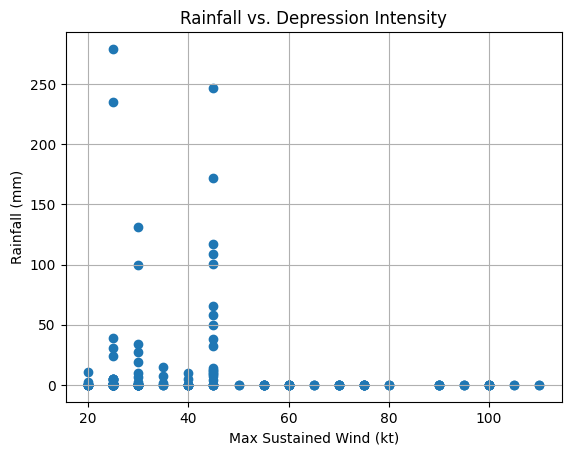

In [218]:
# Example: If 'Maximum Sustained Surface Wind (kt) ' is a column
winds = depression_df_clean['Maximum Sustained Surface Wind (kt) '].values[:len(rainfalls)]
plt.scatter(winds, rainfalls)
plt.xlabel('Max Sustained Wind (kt)')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall vs. Depression Intensity')
plt.grid(True)
plt.show()


In [219]:
output_df = pd.DataFrame({'DateTime': times, 'Rainfall_mm': rainfalls})
output_df.to_csv('depression_center_rainfall_2014.csv', index=False)


In [220]:
import pandas as pd
import xarray as xr
import os

years = range(2014, 2020)
excel_file = 'Best_T_{}.csv'  # Depression data for each year in separate CSVs
file_path_pattern = 'merge_{}.nc'

results = {}

for year in years:
    file_name = excel_file.format(year)
    if not os.path.exists(file_name):
        print(f"Depression data file not found for year {year}: {file_name}")
        continue
    df = pd.read_csv(file_name, encoding='latin1')
    # Convert lat/lon to numeric, coerce errors
    df['Latitude (lat)'] = pd.to_numeric(df['Latitude (lat)'], errors='coerce')
    df['longitude  (Long)'] = pd.to_numeric(df['longitude  (Long)'], errors='coerce')
    df = df.dropna(subset=['Latitude (lat)', 'longitude  (Long)'])
    # Parse datetime
    def parse_time(row):
        try:
            time_str = str(row['Time (UTC)']).zfill(4)
            datetime_str = f"{row['Date(DD-MM-YYYY)']} {time_str}"
            return pd.to_datetime(datetime_str, format='%d-%m-%Y %H%M')
        except:
            return pd.NaT
    df['time'] = df.apply(parse_time, axis=1)
    df = df.dropna(subset=['time'])

    # Filter: Only systems that are always 'D' (Depression)
    filtered_rows = []
    for system_id in df['Serial Number of system during year'].unique():
        system_df = df[df['Serial Number of system during year'] == system_id]
        grades = system_df['Grade (text)'].unique()
        # Only include if ALL grades are 'D'
        if all(str(g).strip() == 'D' for g in grades):
            filtered_rows.append(system_df)
    if filtered_rows:
        filtered_df = pd.concat(filtered_rows)
    else:
        filtered_df = pd.DataFrame()

    if filtered_df.empty:
        print(f"No pure depression systems for year {year}")
        continue

    # Now extract rainfall for these filtered depressions
    nc_file = file_path_pattern.format(year)
    if not os.path.exists(nc_file):
        print(f"GPM NetCDF file not found for year {year}: {nc_file}")
        continue
    gpm_ds = xr.open_dataset(nc_file)
    rainfalls = []
    times = []
    for idx, row in filtered_df.iterrows():
        lat = row['Latitude (lat)']
        lon = row['longitude  (Long)']
        time = row['time']
        try:
            gpm_time = gpm_ds['time'].sel(time=time, method='nearest')
            rain = gpm_ds['precipitationCal'].sel(lat=lat, lon=lon, time=gpm_time, method='nearest').values
            rainfalls.append(rain)
            times.append(time)
        except Exception as e:
            print(f"Error processing year {year}, row {idx}: {e}")
    results[year] = {'times': times, 'rainfalls': rainfalls}

# Print summary for each year
for year in sorted(results.keys()):
    print(f"Year: {year}")
    for t, r in zip(results[year]['times'], results[year]['rainfalls']):
        print(f"Rainfall at depression center on {t.strftime('%Y-%m-%d %H:%M')}: {r:.2f} mm")
    print('\n')


No pure depression systems for year 2015
Error processing year 2019, row 25: Reindexing only valid with uniquely valued Index objects
Error processing year 2019, row 93: Reindexing only valid with uniquely valued Index objects
Error processing year 2019, row 154: Reindexing only valid with uniquely valued Index objects
Error processing year 2019, row 174: Reindexing only valid with uniquely valued Index objects
Error processing year 2019, row 200: Reindexing only valid with uniquely valued Index objects
Error processing year 2019, row 210: Reindexing only valid with uniquely valued Index objects
Error processing year 2019, row 286: Reindexing only valid with uniquely valued Index objects
Error processing year 2019, row 356: Reindexing only valid with uniquely valued Index objects
Error processing year 2019, row 401: Reindexing only valid with uniquely valued Index objects
Error processing year 2019, row 435: Reindexing only valid with uniquely valued Index objects
Error processing year

In [221]:
import numpy as np

# After opening your NetCDF file:
gpm_ds = xr.open_dataset(nc_file)

# Remove duplicate times, keeping the first occurrence
_, unique_time_idx = np.unique(gpm_ds['time'].values, return_index=True)
gpm_ds = gpm_ds.isel(time=unique_time_idx)


In [222]:
# Instead of filtering by system, just select all rows where the grade is D/d/DD/dd
filtered_df = df[df['Grade (text)'].astype(str).str.strip().str.lower().isin(['d', 'dd'])]


In [223]:
for year in results:
    df_out = pd.DataFrame({
        'Datetime': results[year]['times'],
        'Rainfall_mm': results[year]['rainfalls']
    })
    df_out.to_csv(f'depression_rainfall_{year}.csv', index=False)


In [224]:
import os
print(os.getcwd())


d:\IMD_Data\Aditya_MTech_Summer_internship_data


In [225]:
import os
print("Current directory:", os.getcwd())
print("Files:", os.listdir())


Current directory: d:\IMD_Data\Aditya_MTech_Summer_internship_data
Files: ['Annual Radial and Azimuthal Distribution of Rainfall (2014–2020).png', 'Best_Tracks.csv', 'Best_Tracks.xls', 'Best_T_2014.csv', 'Best_T_2015.csv', 'Best_T_2016.csv', 'Best_T_2017.csv', 'Best_T_2018.csv', 'Best_T_2019.csv', 'Best_T_2020.csv', 'c08063_Best Tracks__Data (1982-2024).xlsx', 'DD - 6. 08.19.ipynb', 'depression_center_rainfall_2014.csv', 'depression_rainfall_2014.csv', 'depression_rainfall_2016.csv', 'depression_rainfall_2017.csv', 'depression_rainfall_2018.csv', 'depression_rainfall_2019.csv', 'GPM_3IMERGDF_07-20250607_144323', 'merge_2014.nc', 'merge_2015.nc', 'merge_2016.nc', 'merge_2017.nc', 'merge_2018.nc', 'merge_2019.nc', 'ML.ipynb', 'run.ipynb', 'Summary of Most Frequent Maximum Rainfall Directions.csv', 'TC - 6.18.2019.ipynb', 'tracked_systems.csv']


In [226]:
df = pd.read_csv('Best_T_2015.csv', encoding='latin1')
print(df['Grade (text)'].unique())


[nan 'D' 'DD' 'CS' 'SCS' 'VSCS' 'ESCS']


In [227]:
allowed_grades = ['d', 'dd']
df['Grade_clean'] = df['Grade (text)'].astype(str).str.strip().str.lower()
filtered_df = df[df['Grade_clean'].isin(allowed_grades)]
print(filtered_df.head())
print(f"Number of depression/deep depression rows: {len(filtered_df)}")


   Serial Number of system during year Basin of origin     Name  \
1                                  1.0             ARB  ASHOBAA   
2                                  1.0             ARB  ASHOBAA   
3                                  1.0             ARB  ASHOBAA   
4                                  1.0             ARB  ASHOBAA   
5                                  1.0             ARB  ASHOBAA   

  Date(DD-MM-YYYY)  Time (UTC)  Latitude (lat)  longitude  (Long)  \
1       07-06-2015       300.0            14.5               68.5   
2       07-06-2015       600.0            15.0               68.2   
3       07-06-2015      1200.0            16.0               68.0   
4       07-06-2015      1800.0            16.5               68.0   
5       08-06-2015         0.0            17.5               67.5   

  CI No [or "T. No"]  Estimated Central Pressure (hPa) [or "E.C.P"]  \
1                1.5                                         1004.0   
2                1.5                    

In [228]:
import pandas as pd

years = range(2014, 2020)
monsoon_months = [6, 7, 8, 9]  # June to September

depression_counts = {}

for year in years:
    file = f'Best_T_{year}.csv'
    df = pd.read_csv(file, encoding='latin1')
    # Clean and filter
    df['Grade_clean'] = df['Grade (text)'].astype(str).str.strip().str.lower()
    df['Date_parsed'] = pd.to_datetime(df['Date(DD-MM-YYYY)'], format='%d-%m-%Y', errors='coerce')
    # Filter for monsoon months and D/DD grades
    mask = df['Grade_clean'].isin(['d', 'dd']) & df['Date_parsed'].dt.month.isin(monsoon_months)
    monsoon_df = df[mask]
    # Count unique systems
    n_systems = monsoon_df['Serial Number of system during year'].dropna().unique()
    depression_counts[year] = len(n_systems)

print("Monsoon Depression Counts (2014–2019):")
for y, n in depression_counts.items():
    print(f"{y}: {n}")


Monsoon Depression Counts (2014–2019):
2014: 3
2015: 8
2016: 4
2017: 5
2018: 6
2019: 4


In [229]:
import os
print("Current working directory:", os.getcwd())
print("Files in directory:", os.listdir())


Current working directory: d:\IMD_Data\Aditya_MTech_Summer_internship_data
Files in directory: ['Annual Radial and Azimuthal Distribution of Rainfall (2014–2020).png', 'Best_Tracks.csv', 'Best_Tracks.xls', 'Best_T_2014.csv', 'Best_T_2015.csv', 'Best_T_2016.csv', 'Best_T_2017.csv', 'Best_T_2018.csv', 'Best_T_2019.csv', 'Best_T_2020.csv', 'c08063_Best Tracks__Data (1982-2024).xlsx', 'DD - 6. 08.19.ipynb', 'depression_center_rainfall_2014.csv', 'depression_rainfall_2014.csv', 'depression_rainfall_2016.csv', 'depression_rainfall_2017.csv', 'depression_rainfall_2018.csv', 'depression_rainfall_2019.csv', 'GPM_3IMERGDF_07-20250607_144323', 'merge_2014.nc', 'merge_2015.nc', 'merge_2016.nc', 'merge_2017.nc', 'merge_2018.nc', 'merge_2019.nc', 'ML.ipynb', 'run.ipynb', 'Summary of Most Frequent Maximum Rainfall Directions.csv', 'TC - 6.18.2019.ipynb', 'tracked_systems.csv']


In [230]:
import pandas as pd

# Load 2014 depression data
file_2014 = 'Best_T_2014.csv'
df_2014 = pd.read_csv(file_2014, encoding='latin1')

# Clean and filter
df_2014['Grade_clean'] = df_2014['Grade (text)'].astype(str).str.strip().str.lower()
df_2014['Date_parsed'] = pd.to_datetime(df_2014['Date(DD-MM-YYYY)'], format='%d-%m-%Y', errors='coerce')

# Filter for monsoon months and grades D/DD
monsoon_months = [6, 7, 8, 9]
mask = df_2014['Grade_clean'].isin(['d', 'dd']) & df_2014['Date_parsed'].dt.month.isin(monsoon_months)
monsoon_df_2014 = df_2014[mask]

# Drop rows with missing lat/lon
monsoon_df_2014 = monsoon_df_2014.dropna(subset=['Latitude (lat)', 'longitude  (Long)'])

# Sort by system and date/time
monsoon_df_2014 = monsoon_df_2014.sort_values(by=['Serial Number of system during year', 'Date_parsed', 'Time (UTC)'])

# For each unique depression, print the track (date, lat, lon)
for sys_id, group in monsoon_df_2014.groupby('Serial Number of system during year'):
    print(f"\nDepression System {int(sys_id)}:")
    for _, row in group.iterrows():
        date = row['Date_parsed'].strftime('%Y-%m-%d')
        time = str(row['Time (UTC)']).zfill(4)
        lat = row['Latitude (lat)']
        lon = row['longitude  (Long)']
        print(f"  {date} {time} UTC - Lat: {lat}, Lon: {lon}")



Depression System 3:
  2014-06-10 1200 UTC - Lat: 16, Lon: 68.0
  2014-06-10 1800 UTC - Lat: 16.5, Lon: 67.5
  2014-06-10 0900 UTC - Lat: 15.5, Lon: 68.5
  2014-06-13 1200 UTC - Lat: 19.8, Lon: 62.4
  2014-06-13 1800 UTC - Lat: 20, Lon: 62.0
  2014-06-13 0900 UTC - Lat: 19.5, Lon: 62.5
  2014-06-14 0000 UTC - Lat: 20.5, Lon: 62.0

Depression System 4:
  2014-07-21 1200 UTC - Lat: 22.5, Lon: 85.0
  2014-07-21 1800 UTC - Lat: 22.5, Lon: 84.0
  2014-07-21 0300 UTC - Lat: 22, Lon: 87.0
  2014-07-21 0600 UTC - Lat: 22.2, Lon: 86.4
  2014-07-22 0000 UTC - Lat: 22.5, Lon: 83.0
  2014-07-22 1200 UTC - Lat: 22.5, Lon: 81.0
  2014-07-22 1800 UTC - Lat: 22.5, Lon: 79.6
  2014-07-22 0300 UTC - Lat: 22.5, Lon: 82.5
  2014-07-22 0600 UTC - Lat: 22.5, Lon: 82.0
  2014-07-23 0000 UTC - Lat: 22.5, Lon: 78.2
  2014-07-23 0300 UTC - Lat: 22.5, Lon: 77.5
  2014-07-23 0600 UTC - Lat: 22.5, Lon: 77.0

Depression System 5:
  2014-08-03 1200 UTC - Lat: 21.5, Lon: 88.5
  2014-08-03 1800 UTC - Lat: 21.9, Lon: 

C:\Users\HONOR\AppData\Local\Temp\ipykernel_25044\509299698.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsoon_df_2014['Latitude (lat)'] = pd.to_numeric(monsoon_df_2014['Latitude (lat)'], errors='coerce')
C:\Users\HONOR\AppData\Local\Temp\ipykernel_25044\509299698.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsoon_df_2014['longitude  (Long)'] = pd.to_numeric(monsoon_df_2014['longitude  (Long)'], errors='coerce')


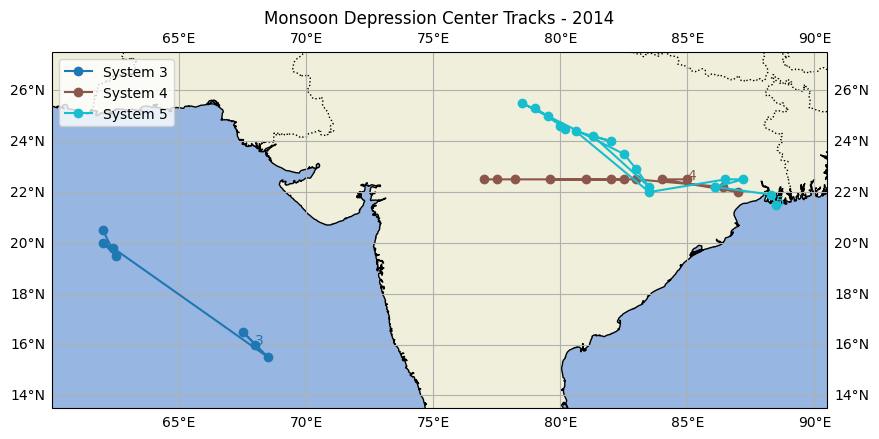

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load 2014 depression data
file_2014 = 'Best_T_2014.csv'
df_2014 = pd.read_csv(file_2014, encoding='latin1')

# Clean and filter
df_2014['Grade_clean'] = df_2014['Grade (text)'].astype(str).str.strip().str.lower()
df_2014['Date_parsed'] = pd.to_datetime(df_2014['Date(DD-MM-YYYY)'], format='%d-%m-%Y', errors='coerce')

# Filter for monsoon months and grades D/DD
monsoon_months = [6, 7, 8, 9]
mask = df_2014['Grade_clean'].isin(['d', 'dd']) & df_2014['Date_parsed'].dt.month.isin(monsoon_months)
monsoon_df_2014 = df_2014[mask]

# Convert lat/lon to numeric and drop NaN
monsoon_df_2014['Latitude (lat)'] = pd.to_numeric(monsoon_df_2014['Latitude (lat)'], errors='coerce')
monsoon_df_2014['longitude  (Long)'] = pd.to_numeric(monsoon_df_2014['longitude  (Long)'], errors='coerce')
monsoon_df_2014 = monsoon_df_2014.dropna(subset=['Latitude (lat)', 'longitude  (Long)', 'Serial Number of system during year'])

# Sort for plotting
monsoon_df_2014 = monsoon_df_2014.sort_values(by=['Serial Number of system during year', 'Date_parsed', 'Time (UTC)'])

# Calculate dynamic extent
min_lon = monsoon_df_2014['longitude  (Long)'].min() - 2
max_lon = monsoon_df_2014['longitude  (Long)'].max() + 2
min_lat = monsoon_df_2014['Latitude (lat)'].min() - 2
max_lat = monsoon_df_2014['Latitude (lat)'].max() + 2

# Plot with Cartopy
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

systems = monsoon_df_2014['Serial Number of system during year'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(systems)))

for color, sys_id in zip(colors, systems):
    group = monsoon_df_2014[monsoon_df_2014['Serial Number of system during year'] == sys_id]
    group = group.sort_values(by=['Date_parsed', 'Time (UTC)'])
    ax.plot(group['longitude  (Long)'], group['Latitude (lat)'], marker='o', label=f'System {int(sys_id)}', color=color, transform=ccrs.PlateCarree())
    first_row = group.iloc[0]
    ax.text(first_row['longitude  (Long)'], first_row['Latitude (lat)'], f'{int(sys_id)}', fontsize=10, color=color, transform=ccrs.PlateCarree())

plt.title('Monsoon Depression Center Tracks - 2014')
plt.legend(loc='upper left')
plt.show()


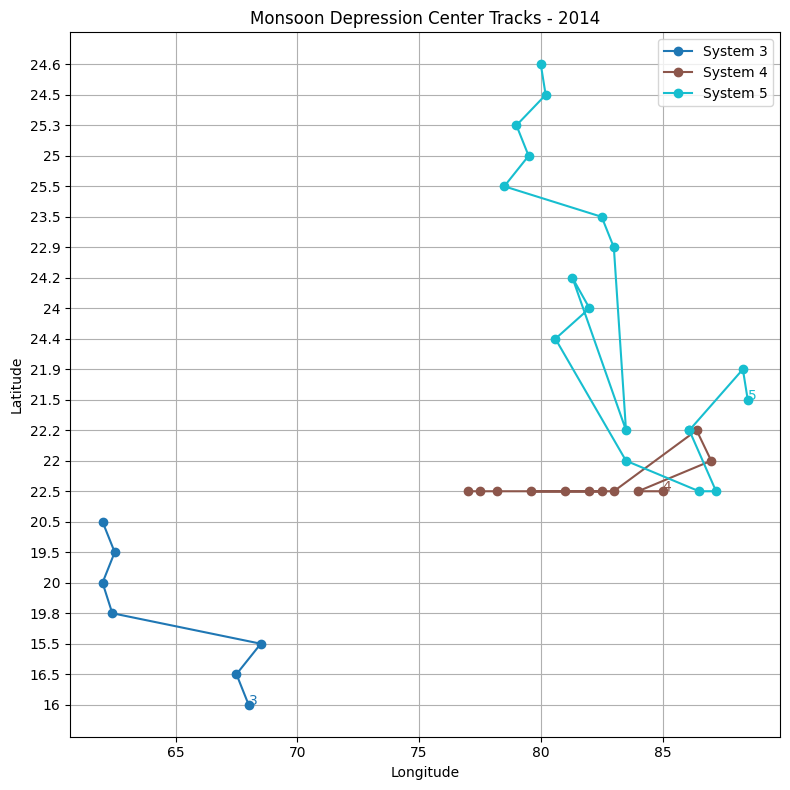

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load 2014 depression data
file_2014 = 'Best_T_2014.csv'
df_2014 = pd.read_csv(file_2014, encoding='latin1')

# Clean and filter
df_2014['Grade_clean'] = df_2014['Grade (text)'].astype(str).str.strip().str.lower()
df_2014['Date_parsed'] = pd.to_datetime(df_2014['Date(DD-MM-YYYY)'], format='%d-%m-%Y', errors='coerce')

# Filter for monsoon months and grades D/DD
monsoon_months = [6, 7, 8, 9]
mask = df_2014['Grade_clean'].isin(['d', 'dd']) & df_2014['Date_parsed'].dt.month.isin(monsoon_months)
monsoon_df_2014 = df_2014[mask]

# Drop rows with missing lat/lon or serial number
monsoon_df_2014 = monsoon_df_2014.dropna(subset=['Latitude (lat)', 'longitude  (Long)', 'Serial Number of system during year'])

# Sort for plotting
monsoon_df_2014 = monsoon_df_2014.sort_values(by=['Serial Number of system during year', 'Date_parsed', 'Time (UTC)'])

# Plot
plt.figure(figsize=(8, 8))
systems = monsoon_df_2014['Serial Number of system during year'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(systems)))

for color, sys_id in zip(colors, systems):
    group = monsoon_df_2014[monsoon_df_2014['Serial Number of system during year'] == sys_id]
    plt.plot(group['longitude  (Long)'], group['Latitude (lat)'], marker='o', label=f'System {int(sys_id)}', color=color)
    # Optionally, annotate the first point of each track
    first_row = group.iloc[0]
    plt.annotate(f'{int(sys_id)}', (first_row['longitude  (Long)'], first_row['Latitude (lat)']), fontsize=10, color=color)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Monsoon Depression Center Tracks - 2014')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [233]:
import xarray as xr

# Open one file to explore its structure
ds = xr.open_dataset('merge_2014.nc')
print(ds)


<xarray.Dataset> Size: 334MB
Dimensions:                    (lon: 401, lat: 351, time: 108, bnds: 2)
Coordinates:
  * lon                        (lon) float32 2kB 60.05 60.15 ... 99.95 100.1
  * lat                        (lat) float32 1kB 4.95 5.05 5.15 ... 39.85 39.95
  * time                       (time) datetime64[ns] 864B 2014-06-01 ... 2014...
Dimensions without coordinates: bnds
Data variables:
    time_bnds                  (time, bnds) datetime64[ns] 2kB ...
    precipitationCal           (time, lon, lat) float32 61MB ...
    HQprecipitation            (time, lon, lat) float32 61MB ...
    precipitationCal_cnt       (time, lon, lat) int16 30MB ...
    randomError                (time, lon, lat) float32 61MB ...
    randomError_cnt            (time, lon, lat) int16 30MB ...
    precipitationCal_cnt_cond  (time, lon, lat) int16 30MB ...
    HQprecipitation_cnt        (time, lon, lat) int16 30MB ...
    HQprecipitation_cnt_cond   (time, lon, lat) int16 30MB ...
Attributes: (12/13

In [234]:
import os
print(os.listdir('d:/IMD_Data/Aditya_MTech_Summer_internship_data'))


['Annual Radial and Azimuthal Distribution of Rainfall (2014–2020).png', 'Best_Tracks.csv', 'Best_Tracks.xls', 'Best_T_2014.csv', 'Best_T_2015.csv', 'Best_T_2016.csv', 'Best_T_2017.csv', 'Best_T_2018.csv', 'Best_T_2019.csv', 'Best_T_2020.csv', 'c08063_Best Tracks__Data (1982-2024).xlsx', 'DD - 6. 08.19.ipynb', 'depression_center_rainfall_2014.csv', 'depression_rainfall_2014.csv', 'depression_rainfall_2016.csv', 'depression_rainfall_2017.csv', 'depression_rainfall_2018.csv', 'depression_rainfall_2019.csv', 'GPM_3IMERGDF_07-20250607_144323', 'merge_2014.nc', 'merge_2015.nc', 'merge_2016.nc', 'merge_2017.nc', 'merge_2018.nc', 'merge_2019.nc', 'ML.ipynb', 'run.ipynb', 'Summary of Most Frequent Maximum Rainfall Directions.csv', 'TC - 6.18.2019.ipynb', 'tracked_systems.csv']


In [235]:
import xarray as xr
import pandas as pd

years = range(2014, 2020)
variables = ['precipitationCal', 'HQprecipitation']
results = []

for year in years:
    fname = f'merge_{year}.nc'
    ds = xr.open_dataset(fname)
    for var in variables:
        data = ds[var]
        results.append({
            'year': year,
            'variable': var,
            'mean': float(data.mean().values),
            'min': float(data.min().values),
            'max': float(data.max().values)
        })
    ds.close()

df = pd.DataFrame(results)
print(df)


    year          variable      mean  min          max
0   2014  precipitationCal  5.225104  0.0   850.758240
1   2014   HQprecipitation  1.589119  0.0   368.184998
2   2015  precipitationCal  5.475657  0.0  1160.660156
3   2015   HQprecipitation  1.583956  0.0   498.689972
4   2016  precipitationCal  5.322923  0.0   752.411865
5   2016   HQprecipitation  1.505654  0.0   212.220001
6   2017  precipitationCal  5.336936  0.0   994.844543
7   2017   HQprecipitation  1.507935  0.0   286.070007
8   2018  precipitationCal  4.829168  0.0   920.861389
9   2018   HQprecipitation  1.399243  0.0   309.479980
10  2019  precipitationCal  5.845985  0.0  1131.826660
11  2019   HQprecipitation  1.304778  0.0   325.885010


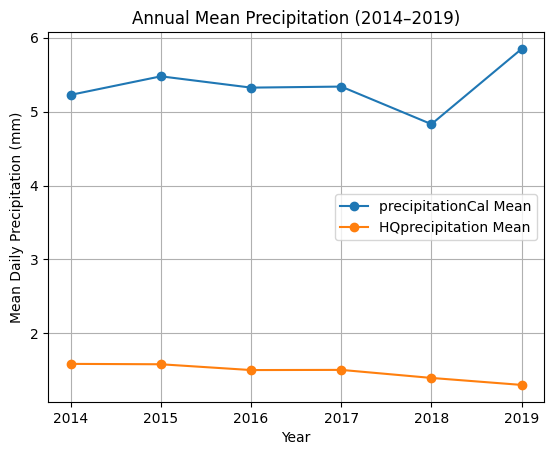

In [236]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
for var in ['precipitationCal', 'HQprecipitation']:
    subset = df[df['variable'] == var]
    plt.plot(subset['year'], subset['mean'], marker='o', label=f'{var} Mean')
plt.xlabel('Year')
plt.ylabel('Mean Daily Precipitation (mm)')
plt.title('Annual Mean Precipitation (2014–2019)')
plt.legend()
plt.grid(True)
plt.show()
